# **Data exploration of Sustainability in World Cities**

**42577 - Introduction to Business Analytics course**

Students:

s118227 | Laurids Joos Mikkelsen

s154431 | Jonas Peter Winberg Waaben

s202669 | Kiriakos Tsalkitzidis

#**Introduction**

In an everchanging world filled with challenges that can seem hard to overcome we want to model our behavior after those who do well in aspects that we lack ourselves. Standing together in these challenging times and sharing the workload and knowledge on how to best overcome these challenges globally will be a major part of moving forward and changing the outlook of the future. 

In this notebook we will investigate the dataset 'Cities' that contains variables relating to the sustainability of cities around the world. The dataset is from the “Urban Typologies” project with 65 different indicators related to demographics, mobility, economy and city morphology. 

The means of transport greatly effects CO2 emissions worldwide. In the USA, transport account for an estimated 28 % of US CO2 emissions ([source](https://www.epa.gov/transportation-air-pollution-and-climate-change/carbon-pollution-transportation)) and 27 % in the EU ([source](https://www.eea.europa.eu/data-and-maps/indicators/transport-emissions-of-greenhouse-gases/transport-emissions-of-greenhouse-gases-12)). According to the International Energy Agency (IEA) passenger road vehicles contributes with three quarters of the global CO2 emissions by transport ([source](https://www.iea.org/topics/transport)).


---

Table of contents:

1.   Date preparation and descriptive statistics

  1.1 Looking for wrong values

  1.2 Columns with economic values

  1.3 Columns with public transport values

  1.4 Columns with infrastructure values

  1.5 Columns with demographic values

  1.6 Look at percentage of data missing and compare it to the correlation with CO2 emission

  1.7 Fill NaN

  1.8 Standardization

2.   Prediction challenge 
  
  2.1 Prediction challenge part 1

  2.2 Prediction challenge part 2

  2.3 Transferability

3. Exploratory part

  3.1 Exploratory part 1: Completing modeshare columns with imputation by regression

  3.2 Exploratory part 2: Neural network

  3.3 Exploratory part 3: Clustering
  
4. Discussion & conclusions







---


The first part of the notebook is concerned with preparing the dataset for further analysis and descriptive statistics to get a deeper understanding of the data. This entails looking for wrong values, outliers, irregularities, NaN treatment and more.

The second part of the notebook will focus on a prediction challenge where the goal is to predict the ‘CO2 Emissions per Capita (metric tonnes)’ for the cities provided in the dataset. The predictions consist of two parts where the first one will do a training and test set split of 75% and 25% respectively, while the second part will have a test set consisting of all the cities that are within North and South America and the training set will consist of the cities from the rest of the world. 

The third part of the notebook will focus on the exploratory part of the data science challenge. Here we have formulated the following research questions that we want to explore further.

1.	Can we use regression to predict the modeshare missing values and based on the modeshare percentages determine the main mode of transport in a city?
2.	Is it possible to predict road deaths per 1000 based on a city's infrastructure and mobility patterns by using a neural network? Giving us possibly a strong indication on how the infrastructure influences road deaths and subsequently a call for action.
3.	Can the cities be clustered in a way that yield further meaningful insights?

Through research, visualization and reflection we attempt to answer these questions and some interesting connections are drawn between the amount of road deaths in a city and the wealth, infrastructure and transportation modes of that said city.


# 1 Data preperation and descriptive statistics

This section describes how the dataset is prepared for further analysis.

In [ ]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_rows', 5) #instead us using df.head()
pd.set_option('display.max_columns', 80) #to see all columns
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math

Importing the dataset:

In [ ]:
# Use this to upload the excel file Cities.xlsx (or Cities.xls, but then change the code with df = ...)
from google.colab import files
uploaded = files.upload()
import io

# if running locally use:
df = pd.read_excel('Cities.xls')

Saving Cities.xls to Cities.xls


In [ ]:
# Dropping empty column
df = df.drop('Unnamed: 0',axis=1)

Let's start by taking a quick look at the data:

In [ ]:
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8,0.0,0.

We can see that the column names contain both small and capital letters, as well as different special characters ()/%.- and spaces. Therefore, we simplify and unify the naming of the columns to minimize risk of typos later. 

In [ ]:
# unifying column name formatting 

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%','p').str.replace('–_','').str.replace('.','').str.replace('/','')

In [ ]:
# unified names of columns 
df.columns

Index(['city', 'cityid', 'clusterid', 'typology', 'country', 'car_modeshare_p',
       'public_transit_modeshare_p', 'bicycle_modeshare_p',
       'walking_modeshare_p', 'gasoline_pump_price_usdliter',
       'road_deaths_rate_per_1000', 'subway_length_km',
       'subway_length_density_per_km', 'subway_stations_per_hundred_thousand',
       'subway_ridership_per_capita', 'subway_age_years', 'brt_length_km',
       'brt_system_length_density_per_km',
       'brt_stations_per_hundred_thousand_persons',
       'brt_fleet_per_hundred_thousand_persons',
       'brt_annual_ridership_per_capita', 'brt_age_years',
       'bikeshare_stations', 'bikeshare_stations_per_hundred_thousand_persons',
       'bikeshare_number_of_bikes',
       'bikeshare_bicycles_per_hundred_thousand_persons',
       'bikeshare_age_years', 'congestion_p', 'congestion_am_peak_p',
       'congestion_pm_peak_p', 'traffic_index', 'travel_time_index',
       'inefficiency_index', 'population', 'land_area_sq_km',
       'po

In [ ]:
# using cityid as the index of the dataset
df = df.set_index('cityid')
df = df.sort_index()

## 1.1 Looking for wrong values

To find out if there are any wrong values, we will start looking for values that are not numerical, where a numerical value is expected.

### Datatype consistency

In [ ]:
#columns with non int/float values where numerical is anticipated
df.select_dtypes(exclude=['float64','int64']).columns

Index(['city', 'typology', 'country', 'bicycle_modeshare_p',
       'bikeshare_stations'],
      dtype='object')

In [ ]:
df[df.select_dtypes(exclude=['float64','int64']).columns].head()

,city,typology,country,bicycle_modeshare_p,bikeshare_stations
cityid,,,,,
1,Kabul,Congested Emerging,Afghanistan,0,0
2,Algiers,Congested Emerging,Algeria,NaN,0
3,Oran,BusTransit Sprawl,Algeria,NaN,0
4,Luanda,Congested Boomer,Angola,NaN,0
5,Huambo,Congested Emerging,Angola,NaN,0


We can see that the columns bicycle_modeshare_p and	bikeshare_stations contain non numerical datatypes. By looking through the columns it was found that they both contain some empty strings " ". These are changed to NaN.

In [ ]:
#Change string " " to np.nan to make it numeric instead of object
df['bikeshare_stations'].loc[df['bikeshare_stations'] == " "] = np.nan
df['bicycle_modeshare_p'].loc[df['bicycle_modeshare_p'] == " "] = np.nan

df['bikeshare_stations'] = pd.to_numeric(df['bikeshare_stations'])
df['bicycle_modeshare_p'] = pd.to_numeric(df['bicycle_modeshare_p'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Percentage consistency

Here we will see if columns containing percentages either exceed 100 or are below 0.

In [ ]:
for column in df.columns:
    if column.endswith("_p"):
        print(column, sum(df[column] > 100), df[column].max())

car_modeshare_p 0 94.8
public_transit_modeshare_p 0 82.5
bicycle_modeshare_p 0 55.3
walking_modeshare_p 0 78.0
congestion_p 0 66.0
congestion_am_peak_p 0 96.0
congestion_pm_peak_p 2 118.0
urbanization_rate_2015_p 0 100.0
unemployment_rate_p 0 38.0
poverty_rate_p 0 61.6
smartphone_penetration_p 0 88.0


It can be seen that *congestion_pm_peak_p*, which is percentage, have two values above 100%. The congestion data in this dataset comes from TomTom. The website provided in the paper reveals that TomTom defines congestion percentage as the average increased trip duration for a 30 minute trip, compared to free flowing traffic. A percentage above 100 therefore makes sense, since this would simply mean that a 30 minute is anticipated to take at least twice as long. [Source](https://www.tomtom.com/en_gb/traffic-index/)

In [ ]:
for column in df.columns:
    if column.endswith("_p"):
        print(column, sum(df[column] < 0), df[column].min())

car_modeshare_p 0 0.0
public_transit_modeshare_p 0 0.4
bicycle_modeshare_p 0 0.0
walking_modeshare_p 0 0.0
congestion_p 0 9.0
congestion_am_peak_p 0 11.0
congestion_pm_peak_p 0 22.0
urbanization_rate_2015_p 0 16.1
unemployment_rate_p 0 0.2
poverty_rate_p 0 0.15
smartphone_penetration_p 0 4.0


No percentage values are below 0, so no problems with percentages.

## 1.2 Columns with economic values

This section looks at columns with data related to economics and development. Outliers and NaNs are investigated, and afterwards some of the NaNs are filled out with other values based on the dataset.

In [ ]:
# to see more of the data at a time when printing
pd.set_option('display.max_rows', 20)

In [ ]:
# economic data columns
dfe = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,40:56].columns.astype(str)
dfe.append(df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,69:70].columns.astype(str))
dfe.append(df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,39:40].columns.astype(str))
dfe.append(df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,69:70].columns.astype(str))

Index(['cost_of_living_index', 'rent_index', 'grocery_index',
       'restaurant_price_index', 'local_purchasing_power_index',
       'gini_coefficient', 'poverty_rate_p', 'life_expectancy_years',
       'safety_index', 'internet_penetration', 'digital_penetration',
       'innovation_index', 'smartphone_penetration_p',
       'co2_emissions_per_capita_metric_tonnes', 'pollution_index',
       'street_length_total_m', 'sustainability_factor'],
      dtype='object')

### Detecting outliers 

The following is an example of potential outliers that have been considered and determined whether they are realistic or not for the economic values. 

In [ ]:
coln = ['cost_of_living_index','grocery_index','restaurant_price_index']

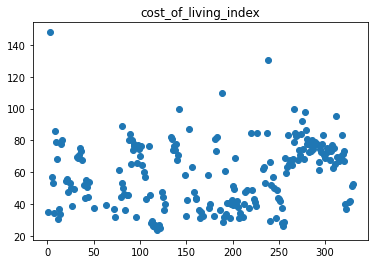

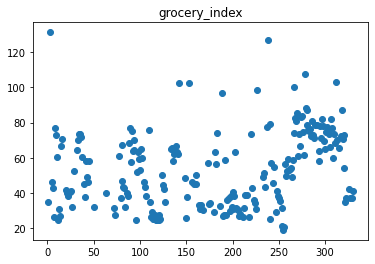

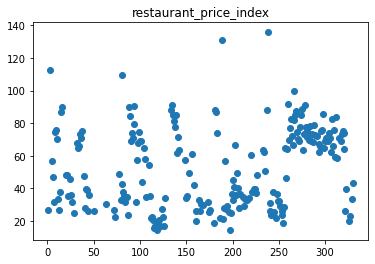

In [ ]:
for i in range(len(coln)):
    plt.scatter(range(0,len(df[coln[i]])),df[coln[i]])
    plt.title(coln[i])
    plt.show()

In [ ]:
label = coln[0]
print(label)
df.loc[df[label] > 100]

cost_of_living_index


,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index,street_length_total_m,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,Luanda,3,Congested Boomer,Angola,NaN,NaN,NaN,NaN,0.76,26.9,0.0,0.000000,0.00000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6955000,984,7100,1023451,2198754,2765042,1368858,44.1,7.2,6769.0,25.0,147.99,144.32,131.28,112.84,25.09,0.62,18.7,52.40,34.99,29.5,0.11,21.0,NaN,1.384496,NaN,7758223.419,6.203790e+09,100.082864,46581.0,799.640511,5.728079,2.973880,1.026107,0.000528,0.000000,0.061402,0.087578,0.000000,0.485812,0.175425,0.429534,0.642123,0.331717,0.514084
190,Oslo,9,MassTransit Heavyweight,Norway,51.00,29.00,6.00,12.00,2.04,1.1,86.0,0.296552,9.79798,88.888889,51,0.0,0.000000,0.000000,0.000000,0.000000,0.0,106.0,10.707071,NaN,NaN,15.0,30.0,57.0,69.0,142.98,38.33,188.67,990000,290,3200,89784,124105,175575,86534,80.5,2.4,69091.0,2.8,109.84,47.25,96.60,130.86,106.43,NaN,NaN,80.60,50.89,95.0,0.79,47.0,NaN,14.600000,24.21,2906900.081,3.104559e+09,148.364216,11457.0,1067.996400,4.655897,2.628568,1.122771,0.007836,0.005571,0.775307,0.193571,0.429359,0.980480,0.446219,0.001904,0.417624,0.087981,0.280602
239,Zurich,10,MassTransit Moderate,Switzerland,42.92,46.31,4.14,5.65,1.68,1.6,0.0,0.000000,0.00000,0.000000,0,11.0,0.044715,3.396226,2.138365,5.283019,11.0,0.0,0.000000,0.0,0.0,0.0,31.0,48.0,63.0,88.85,34.38,62.87,795000,246,3200,72276,104816,122443,68304,73.9,1.2,56666.0,4.2,130.84,67.54,126.92,135.80,152.73,NaN,NaN,80.93,82.88,86.7,0.76,46.0,NaN,6.700000,14.07,1252653.734,7.359619e+09,128.122505,5826.0,5875.222569,4.656982,2.774189,1.057691,0.002544,0.025206,0.090735,0.346604,0.163072,1.000000,0.575431,0.025346,0.388853,0.185876,0.453369


After a bit of research, it was found that Angola is a very expensive country for expats and the same are Switzerland and Oslo, so it makes sense, that they have a high cost of living.
They were also found to have high values in grocery index and restaurant prices

### Detecting NaNs
First we look at the percentage of NaN values in the economic data column.

In [ ]:
df[dfe].isnull().sum()/len(df[dfe])

cost_of_living_index                      0.326284
rent_index                                0.326284
grocery_index                             0.326284
restaurant_price_index                    0.326284
local_purchasing_power_index              0.326284
gini_coefficient                          0.317221
poverty_rate_p                            0.413897
life_expectancy_years                     0.000000
safety_index                              0.374622
internet_penetration                      0.003021
digital_penetration                       0.021148
innovation_index                          0.220544
smartphone_penetration_p                  0.338369
co2_emissions_per_capita_metric_tonnes    0.000000
pollution_index                           0.486405
street_length_total_m                     0.042296
dtype: float64

### Simple fill of NaN for economic factors

After looking at the values and how they are correlated with values from the same country, it was found that a good way to fill NaN values were as follows:


**Take mean of same country for:**
* cost_of_living_index
* grocery_index
* restaurant_price_index
* local_purchasing_power_index
* poverty_rate_p
* innovation_index (?)


**Copy from same country for:**
* gini_coefficient
* internet_penetration
* digital_penetration
* smartphone_penetration_p

**To be decided:**
* unemployment_rate_p
* safety_index
* rent_index
* pollution_index


To see the potential improvement, the percentage of NaN values in columns, where they could be filled by taking the mean of other values from the same country, were calculated


In [ ]:
df[["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]].isnull().sum()/len(df)

cost_of_living_index            0.326284
grocery_index                   0.326284
restaurant_price_index          0.326284
local_purchasing_power_index    0.326284
poverty_rate_p                  0.413897
innovation_index                0.220544
dtype: float64

In [ ]:
#Take mean of values from cities in the same country
for label in ["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]:
    for i in range(len(df)):
        if math.isnan(df[label].iloc[i]) and (df.loc[df.iloc[:,4] == df.iloc[i,4], label].sum() > 0): #if all aren't NaN
            df.loc[i,label] = float(df.loc[df.iloc[:,4] == df.iloc[i,4], label].mean())

In [ ]:
df[["cost_of_living_index","grocery_index","restaurant_price_index","local_purchasing_power_index","poverty_rate_p","innovation_index"]].isnull().sum()/len(df)

cost_of_living_index            0.290030
grocery_index                   0.290030
restaurant_price_index          0.290030
local_purchasing_power_index    0.290030
poverty_rate_p                  0.335347
innovation_index                0.199396
dtype: float64

We can see that It have helped fill in a considereable percentage of the missing values.

In [ ]:
df[['gini_coefficient','internet_penetration','digital_penetration','smartphone_penetration_p']].isnull().sum()/len(df)

gini_coefficient            0.317221
internet_penetration        0.003021
digital_penetration         0.021148
smartphone_penetration_p    0.338369
dtype: float64

In [ ]:
#Copy from same country
for label in ['gini_coefficient','internet_penetration','digital_penetration','smartphone_penetration_p']:
    for i in range(len(df)):
        if math.isnan(df[label].iloc[i]) and (df.loc[df.iloc[:,4] == df.iloc[i,4], label].sum() > 0): #if all aren't NaN
            df.loc[i,label] = float(df.loc[df.iloc[:,4] == df.iloc[i,4], label].mode()[0]) #take the most frequent values, also to avoid false values

In [ ]:
df[['gini_coefficient','internet_penetration','digital_penetration','smartphone_penetration_p']].isnull().sum()/len(df)

gini_coefficient            0.244713
internet_penetration        0.003021
digital_penetration         0.018127
smartphone_penetration_p    0.280967
dtype: float64

This method helped fill some NaN for the gini coefficient but did not do much for the other values.

## 1.3 Columns with public transport values
This section deals with the columns related to public transport. 

In [ ]:
#subway
subway = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,7:12]
subway.columns

Index(['subway_length_km', 'subway_length_density_per_km',
       'subway_stations_per_hundred_thousand', 'subway_ridership_per_capita',
       'subway_age_years'],
      dtype='object')

In [ ]:
#brt / Bus Rapid Transit
brt = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,12:18]
brt.columns

Index(['brt_length_km', 'brt_system_length_density_per_km',
       'brt_stations_per_hundred_thousand_persons',
       'brt_fleet_per_hundred_thousand_persons',
       'brt_annual_ridership_per_capita', 'brt_age_years'],
      dtype='object')

In [ ]:
#bikeshare
bikeshare = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,18:23]
bikeshare.columns

Index(['bikeshare_stations', 'bikeshare_stations_per_hundred_thousand_persons',
       'bikeshare_number_of_bikes',
       'bikeshare_bicycles_per_hundred_thousand_persons',
       'bikeshare_age_years'],
      dtype='object')

In [ ]:
#Propensity factors 
propensity = df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,65:68]
propensity.columns

Index(['metro_propensity_factor', 'brt_propensity_factor',
       'bikeshare_propensity_factor'],
      dtype='object')

### Detecting outliers
Here outliers is listed beneath the scatter plots as values which are more than 3 standard deviations from the mean of the column. 


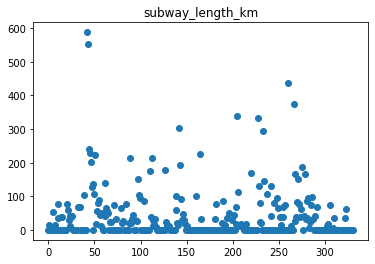

['Shanghai', 'Beijing', 'Tokyo', 'Moscow', 'Seoul-Incheon', 'Madrid', 'London', 'New York(NY)']


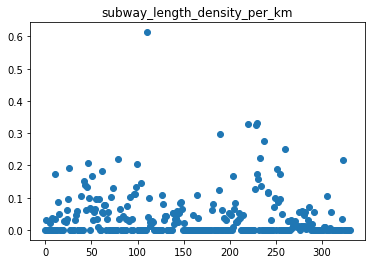

['Hong Kong', 'Oslo', 'Singapore', 'Busan', 'Daegu', 'Stockholm', 'London']


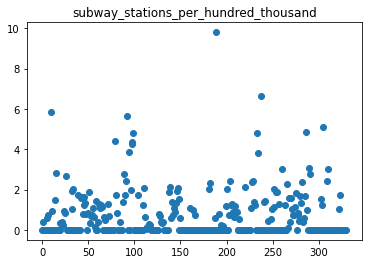

['Vienna', 'Prague', 'Lille', 'Munich', 'Oslo', 'Madrid', 'Stockholm', 'Portland(OR)', 'Salt Lake City(UT)']


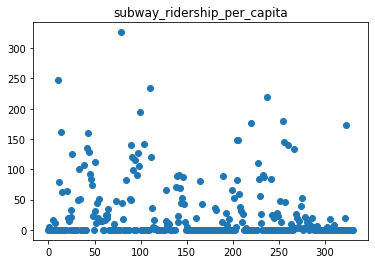

['Vienna', 'Prague', 'Munich', 'Hong Kong', 'Singapore', 'Stockholm', 'Kiev', 'Caracas']


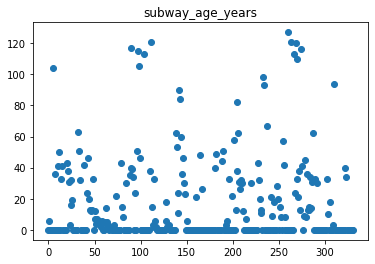

['Buenos Aires', 'Paris', 'Berlin', 'Hamburg', 'Athens', 'Budapest', 'London', 'Glasgow', 'New York(NY)', 'Chicago(IL)', 'Philadelphia(PA)', 'Boston(MA)']


In [ ]:
# Example for how outliers can be found
# creating scatter plots
for i in range(len(subway.columns)):
    plt.scatter(range(0,len(subway[subway.columns[i]])),subway[subway.columns[i]])
    plt.title(subway.columns[i])
    plt.show()

    # printing names of cities with values more than 3 standard deviations away from the mean
    print(df[((df[subway.columns[i]] - df[subway.columns[i]].mean()) / df[subway.columns[i]].std()).abs() > 3].city.to_list())

Here, investigating whether there is truth to these outliers requires extensive investigation of numerous subway system around the world, which is beyond the scope of this project. Although, none of the values looks far reached therefore 

### Detecting NaNs

Here we look at the percentage of NaNs in the public transport columns.

In [ ]:
print(subway.isnull().sum()/len(subway))

subway_length_km                        0.0
subway_length_density_per_km            0.0
subway_stations_per_hundred_thousand    0.0
subway_ridership_per_capita             0.0
subway_age_years                        0.0
dtype: float64


In [ ]:
print(brt.isnull().sum()/len(brt))

brt_length_km                                0.003021
brt_system_length_density_per_km             0.006042
brt_stations_per_hundred_thousand_persons    0.030211
brt_fleet_per_hundred_thousand_persons       0.093656
brt_annual_ridership_per_capita              0.003021
brt_age_years                                0.045317
dtype: float64


In [ ]:
print(bikeshare.isnull().sum()/len(bikeshare))

bikeshare_stations                                 0.012085
bikeshare_stations_per_hundred_thousand_persons    0.003021
bikeshare_number_of_bikes                          0.054381
bikeshare_bicycles_per_hundred_thousand_persons    0.045317
bikeshare_age_years                                0.009063
dtype: float64


In [ ]:
print(propensity.isnull().sum()/len(propensity))

metro_propensity_factor        0.0
brt_propensity_factor          0.0
bikeshare_propensity_factor    0.0
dtype: float64


Overall a low percentage of the public transport columns contain nan's, with the highest percentage being 9.3 %, therefore NaNs in the public transport columns aren't treated further.



### Inconsistencies

Here we look for inconsistencies in the public transport columns. First whether there exist data in all columns for a public transport mode, if data exist in one of the related columns.

In [ ]:
###   Subway    ###

# Making list for checking whether data exist in all columns if a subway exist in the city 
subway_missing = []

for column in range(len(subway.columns)):   
    for row in range(len(subway)):
        if subway.iloc[row,column] == 0:
            if subway.iloc[row, :].sum() != 0:
                subway_missing.append(row)

print(df['city'].loc[subway.iloc[subway_missing].index])
subway.iloc[subway_missing]


cityid
24    Salvador
68       Hefei
69      Fuzhou
Name: city, dtype: object


,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years
cityid,,,,,
24,11.90,0.034000,0.247678,0.0,3
68,24.60,0.033931,0.616622,0.0,1
69,24.89,0.056568,0.514706,0.0,1


Here it can be seen that three subways which are very young (1 and 3 years) don't have data for subway ridership. If it's true that the subways were that young at the time of the original data collection, it could be true that no subway ridership data existed yet.

In [ ]:
###   BRT   ###

# Making list for checking data exist in all columns if a brt exist in the city 
brt_missing = []

for column in range(len(brt.columns)): 
    for row in range(len(brt)):
        if brt.iloc[row,column] == 0:
            if brt.iloc[row, :].sum() != 0:
                brt_missing.append(row)

brt.iloc[brt_missing]

,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years
cityid,,,,,,


No problems with BRT.

In [ ]:
###   Bikeshare   ###

# Making list for checking data exist in all columns if bikshare exist in the city
bikeshare_missing = []

for column in range(len(bikeshare.columns)):
    for row in range(len(bikeshare)):
        if bikeshare.iloc[row, column] == 0:
            if bikeshare.iloc[row, :].sum() != 0:
                bikeshare_missing.append(row)

print(df['city'].loc[bikeshare.iloc[bikeshare_missing].index])
bikeshare.iloc[bikeshare_missing]

cityid
114             Mumbai
117          Bangalore
114             Mumbai
285      Baltimore(MD)
148             Sendai
287       Portland(OR)
311    New Orleans(LA)
Name: city, dtype: object


,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years
cityid,,,,,
114,NaN,0.000000,NaN,0.000000,6.0
117,NaN,0.000000,150.0,1.475652,5.0
114,NaN,0.000000,NaN,0.000000,6.0
285,50.0,2.197802,NaN,0.000000,2.0
148,10.0,0.719424,100.0,7.194245,0.0
287,100.0,5.000000,100.0,5.000000,0.0
311,62.0,6.702703,NaN,NaN,0.0


Here it can be seen that in mumbai there is 0 bikeshare stations and 0 bikeshare bicycles per 100.000 persons, but the number of stations and bicycles are NaNs, but the bikeshare still has an age. Either the 0's are correct and there are no bikeshare in Mumbai, or the 0's are wrong and should have been NaN's.
In bangalore there are numbers of bicycles but no number of stations. This might just mean that the bikes in bangalore doesn't need stations. 
In Baltimore there are stations but no bikes, which doesn't make sense. Here the number of stations could be the same as number of bikes.
In Sendai, Portland and New Orleans the age is 0, which could be true at the time of data collection.

Due to so few numbers missing, and the numbers is deemed of less importance for the predictions and data exploration later on, further investigations are not prioritised and this data is left unchanged.



In [ ]:
subway_corr=subway.assign(co2_emissions_per_capita_metric_tonnes=df["co2_emissions_per_capita_metric_tonnes"])
subway_corr.corr()["co2_emissions_per_capita_metric_tonnes"].sort_values(ascending=False)

co2_emissions_per_capita_metric_tonnes    1.000000
subway_stations_per_hundred_thousand      0.211267
subway_age_years                          0.187048
subway_length_km                          0.135529
subway_ridership_per_capita               0.081169
subway_length_density_per_km              0.030366
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

In [ ]:
brt_corr=brt.assign(co2_emissions_per_capita_metric_tonnes=df["co2_emissions_per_capita_metric_tonnes"])
brt_corr.corr()["co2_emissions_per_capita_metric_tonnes"].sort_values(ascending=False)

co2_emissions_per_capita_metric_tonnes       1.000000
brt_stations_per_hundred_thousand_persons    0.005444
brt_age_years                               -0.016455
brt_fleet_per_hundred_thousand_persons      -0.027336
brt_length_km                               -0.034622
brt_annual_ridership_per_capita             -0.108253
brt_system_length_density_per_km            -0.109062
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

In [ ]:
bikeshare_corr=bikeshare.assign(co2_emissions_per_capita_metric_tonnes=df["co2_emissions_per_capita_metric_tonnes"])
bikeshare_corr.corr()["co2_emissions_per_capita_metric_tonnes"].sort_values(ascending=False)

co2_emissions_per_capita_metric_tonnes             1.000000
bikeshare_age_years                                0.242348
bikeshare_stations_per_hundred_thousand_persons    0.114131
bikeshare_stations                                 0.077070
bikeshare_bicycles_per_hundred_thousand_persons    0.055600
bikeshare_number_of_bikes                          0.046131
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

In [ ]:
propensity_corr=propensity.assign(co2_emissions_per_capita_metric_tonnes=df["co2_emissions_per_capita_metric_tonnes"])
propensity_corr.corr()["co2_emissions_per_capita_metric_tonnes"].sort_values(ascending=False)

co2_emissions_per_capita_metric_tonnes    1.000000
brt_propensity_factor                     0.132038
metro_propensity_factor                   0.103467
bikeshare_propensity_factor              -0.007367
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

It can be seen that there is some relatively low correlations in the values. This does make some sense since it is public transportation that we are looking into. What's most surprising is maybe that it's not more negatively correlated.

## 1.4 Columns with infrastructure values

The data here is focused on the traffic of the cities. First the columns of the data focusing on traffic, density and morphology of the city is selected.

In [ ]:
#congestion: https://www.tomtom.com/en_gb/traffic-index/ranking/
df11=df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,23:26]

#index
df22=df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,26:29]

# Street, density, intersection
df33=df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,56:65]


df44=df[df.select_dtypes(include=['float64','int64']).columns].iloc[:,71:]


In [ ]:
df_merge1=pd.merge(df11,df22, on = 'cityid')
df_merge2=pd.merge(df_merge1,df33, on='cityid')
df3=pd.merge(df_merge2,df44, on='cityid')

df3

,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,4.185928e+09,122.672083,20705.0,956.842164,5.230966,2.688829,1.043663,0.000778,0.000000,0.707286,0.211824,0.330575
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656164,0.559870,0.380830
3,NaN,NaN,NaN,NaN,NaN,NaN,6.104866e+09,88.640113,9253.0,4495.007149,5.749214,3.120828,1.044617,0.000635,0.017992,0.554905,0.689737,0.499762
4,NaN,NaN,NaN,NaN,NaN,NaN,6.203790e+09,100.082864,46581.0,799.640511,5.728079,2.973880,1.026107,0.000528,0.000000,0.642123,0.331717,0.514084
5,NaN,NaN,NaN,NaN,NaN,NaN,4.249366e+08,198.620820,1574.0,810.392514,5.581714,3.023429,1.055167,0.000205,0.000000,0.687646,0.458215,0.313614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,NaN,NaN,NaN,106.2,30.62,105.71,1.692382e+09,198.161707,41349.0,120.101364,5.254804,2.838425,1.059153,0.000805,0.003106,0.591250,0.643038,0.341987
328,NaN,NaN,NaN,160.6,40.78,189.18,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.624623,0.666710,0.239113
329,NaN,NaN,NaN,NaN,NaN,NaN,2.000474e+09,127.419277,11770.0,818.386698,5.527452,3.045303,1.061161,0.000172,0.000000,0.689737,0.375679,0.336923


### Detecting outliers
We will look at outliers for each of the variables to see if theres anything that needs to be investigated or removed. We can also see there is a lot of NaN values and wants to see how many each column holds and the percentage thereof. 

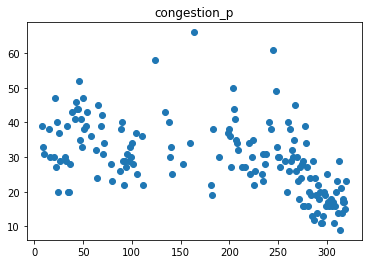

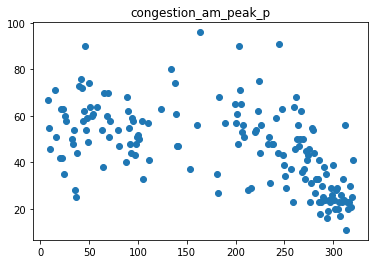

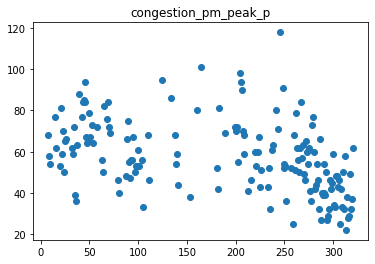

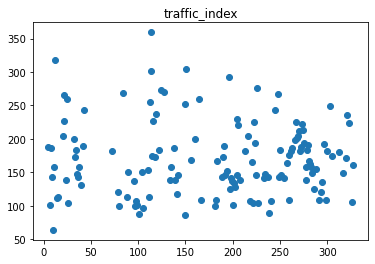

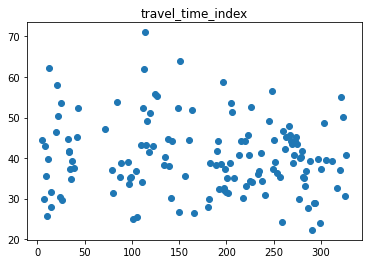

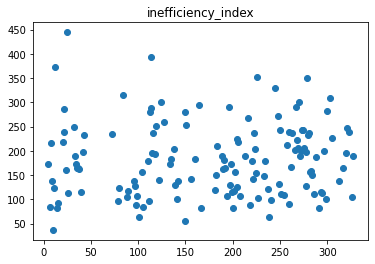

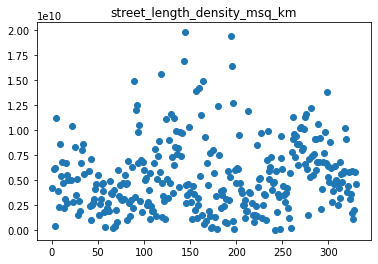

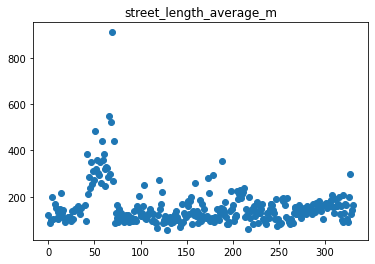

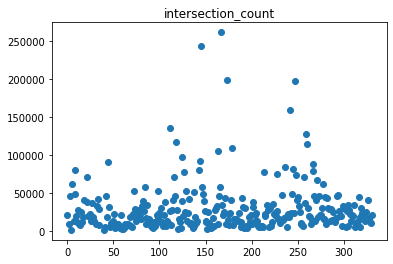

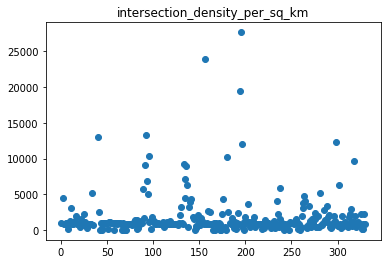

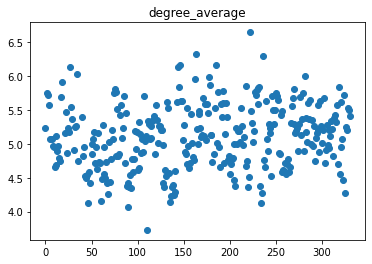

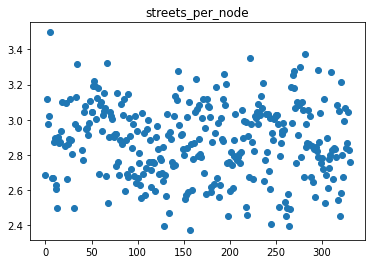

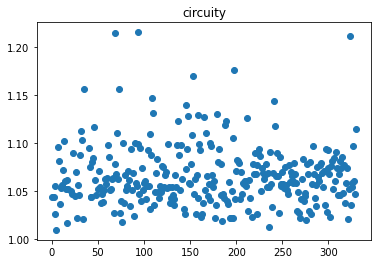

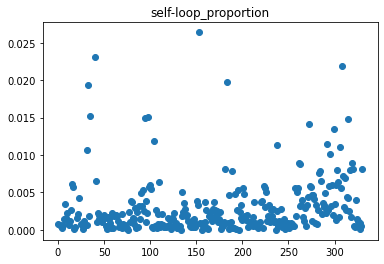

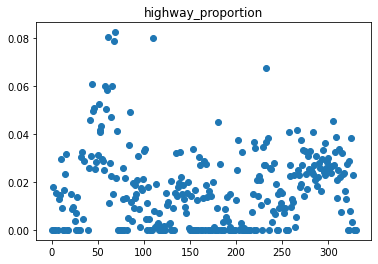

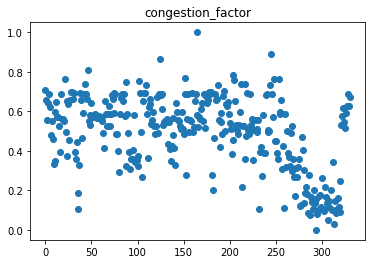

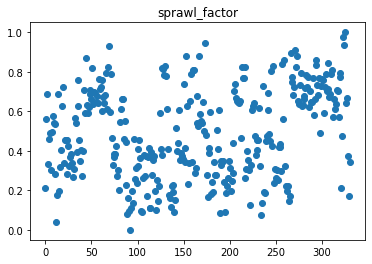

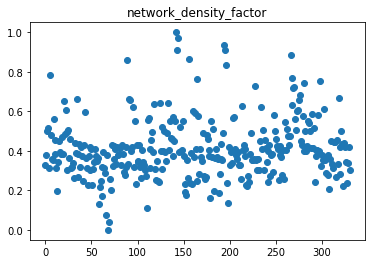

In [ ]:
for i in range(len(df3.columns)):
    plt.scatter(range(len(df3)), df3[df3.select_dtypes(include=['float64', 'int64']).columns].iloc[:, i])
    plt.title(df3.columns[i])
    plt.show()

As mentioned earlier there is some percentages over 100% in the congestion pm peak percentage variable. This is due to the way TomTom calculates the congestion percentages as explained in the early look on the outliers. The rest of the variables does not have that many outliers. The few that shows high numbers makes sense when looking up the cities with a lot of traffic for example. 

In [ ]:
df.loc[df["traffic_index"] > 300]

,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_length_km,brt_system_length_density_per_km,brt_stations_per_hundred_thousand_persons,brt_fleet_per_hundred_thousand_persons,brt_annual_ridership_per_capita,brt_age_years,bikeshare_stations,bikeshare_stations_per_hundred_thousand_persons,bikeshare_number_of_bikes,bikeshare_bicycles_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,gini_coefficient,poverty_rate_p,life_expectancy_years,safety_index,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index,street_length_total_m,street_length_density_msq_km,street_length_average_m,intersection_count,intersection_density_per_sq_km,degree_average,streets_per_node,circuity,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,Dhaka,3,Congested Boomer,Bangladesh,NaN,NaN,NaN,NaN,1.06,13.6,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,317.46,62.33,371.95,16235000,368,44100,3664250,4644700,5134639,2842057,34.3,7.3,972.88,23.0,36.95,6.91,30.90,26.38,39.02,0.31,49.8,62.8,29.39,31.9,0.18,31.0,NaN,0.438736,95.90,5518574.722,4.756501e+09,113.886017,28373.0,861.907466,5.120013,2.630408,1.072214,0.000604,0.000000,0.083926,0.085737,0.401842,0.024069,0.063153,0.816199,0.646291,0.039442,0.311479
114,Mumbai,3,Congested Boomer,India,15.0,45.0,6.0,27.0,1.27,3.2,11.4,0.012940,0.052436,4.369674,3,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,6.0,NaN,NaN,NaN,301.49,62.05,288.09,22885000,881,26000,3930364,3055196,4239060,2895829,32.7,4.3,7005.00,11.7,29.35,21.35,29.33,22.20,69.47,0.37,13.7,55.5,51.17,28.3,0.32,43.0,17.0,1.590273,88.27,1738098.622,1.449919e+09,124.247525,8221.0,834.198382,5.073402,2.884639,1.069184,0.002073,0.019298,0.150546,0.047922,0.448513,0.176602,0.215412,0.734119,0.660284,0.109147,0.312022
115,Kolkata,3,Congested Boomer,India,NaN,NaN,NaN,NaN,1.19,9.4,28.1,0.023339,0.162053,16.019581,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,359.43,71.05,393.79,14810000,1204,12300,2168402,1225036,2364481,2063422,32.7,4.3,4036.00,34.0,26.01,6.67,25.36,20.72,64.86,0.37,13.7,58.0,48.00,28.3,0.32,36.0,17.0,1.590273,81.91,5988758.316,5.116378e+09,125.946547,28045.0,854.330369,5.083077,2.615598,1.083988,0.000714,0.002038,0.216850,0.045061,0.438408,0.103543,0.000000,0.465498,0.639074,0.109207,0.408453
152,Nairobi,1,Congested Emerging,Kenya,7.3,51.5,1.0,41.2,1.05,29.1,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,304.27,63.86,253.73,4930000,557,8900,833856,1022721,1702079,1204199,25.6,4.7,1081.00,NaN,42.81,15.57,37.61,35.23,29.23,0.59,NaN,63.4,36.17,68.4,0.19,33.0,26.0,0.304402,75.38,4275355.666,2.797726e+09,180.753210,13666.0,654.384410,4.886671,2.548142,1.078487,0.003863,0.014004,0.121713,0.091974,0.345646,0.118721,0.145237,0.306973,0.770625,0.413229,0.230592


Looking at the table above the cities with the most traffic is shown. A quick google search shows that Nairobi for example has some of the worst traffic in the world. The same fits for the countries of India and Bangladesh, which means there is no cause for concern with these higher numbers. 

The rest of the variables is more in order to length and averages and not something to be concerned about. 

### Detecting NaNs
Now we look into the NaN values in the infrastructure columns. 

In [ ]:
pd.set_option('display.max_rows',100)
nan_count=df3.isnull().sum(axis=0)
nan_count/len(df3)*100

congestion_p                      50.151057
congestion_am_peak_p              50.151057
congestion_pm_peak_p              50.151057
traffic_index                     57.099698
travel_time_index                 57.099698
inefficiency_index                57.099698
street_length_density_msq_km       4.229607
street_length_average_m            4.229607
intersection_count                 4.229607
intersection_density_per_sq_km     4.229607
degree_average                     4.229607
streets_per_node                   4.229607
circuity                           4.229607
self-loop_proportion               4.229607
highway_proportion                 4.229607
congestion_factor                  0.000000
sprawl_factor                      0.000000
network_density_factor             0.000000
dtype: float64

So the number of NaN values and percentages are very high on a couple of the columns. We want to check the correlation between the columns with a high number of NaN values and the target value which is co2 emissions per capita metric tonnes. We do that in the following.

In [ ]:
df3corr=df[["congestion_p","congestion_am_peak_p","congestion_pm_peak_p","traffic_index","travel_time_index","inefficiency_index","co2_emissions_per_capita_metric_tonnes"]]

df3corr.corr()["co2_emissions_per_capita_metric_tonnes"].sort_values(ascending=False)

co2_emissions_per_capita_metric_tonnes    1.000000
inefficiency_index                       -0.133509
traffic_index                            -0.229211
travel_time_index                        -0.310388
congestion_pm_peak_p                     -0.386783
congestion_p                             -0.439668
congestion_am_peak_p                     -0.473027
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

Here we can see the correlations between the high number of NaN value variables and the variable "co2 emissions per capita metric ton". Since none of the variables have a correlation in between 0.1:-0.1, none of them will be dropped and the NaN values will be filled with the average value of the variables later together with the full dataset.

## 1.5 Columns with demographic values

In the following we further investigate some mobility variables and population and urbanization changes.



In [ ]:
df4 = df[["car_modeshare_p", "public_transit_modeshare_p",	"bicycle_modeshare_p",	"walking_modeshare_p",
         "gasoline_pump_price_usdliter",	"road_deaths_rate_per_1000", "population",	"land_area_sq_km",	
          "population_density_per_sq_km",	"population_change_1990_2000",	"population_change_2000_2010",
          "population_change_2010_2020",	"population_change_2020_2025",	"urbanization_rate_2015_p",	
          "urbanization_rate_change_2015_2025_pp", "sustainability_factor",	"population_factor"]]

### Detecting outliers

First we'll check the data for outliers:




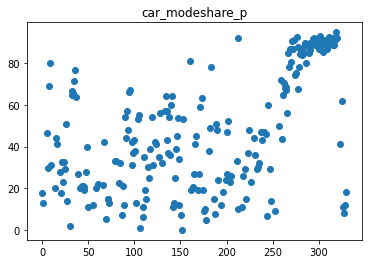

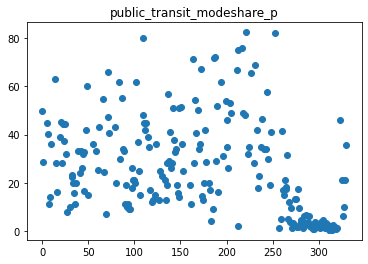

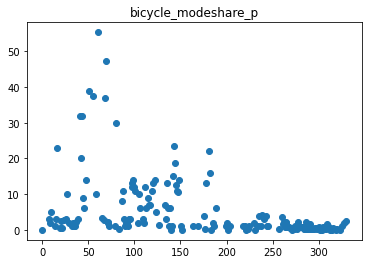

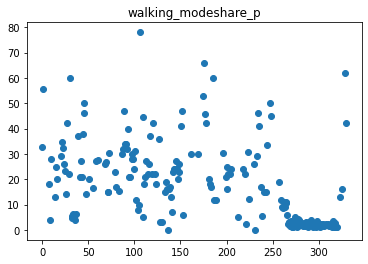

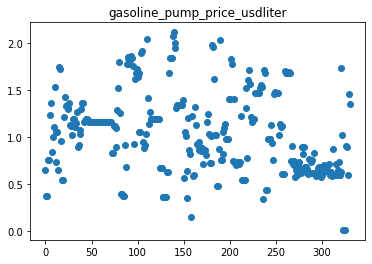

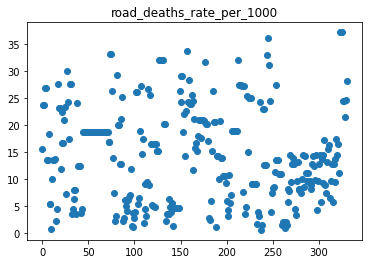

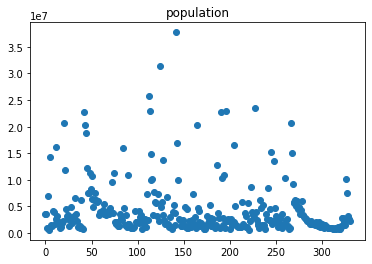

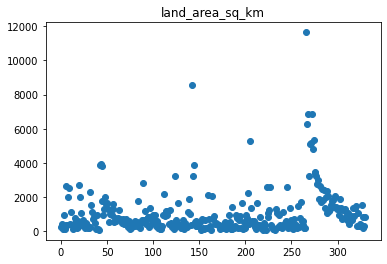

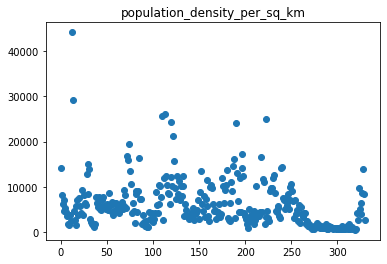

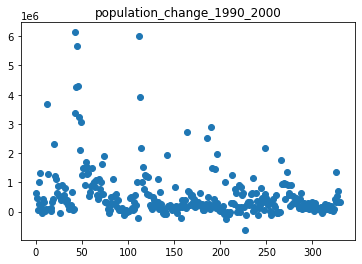

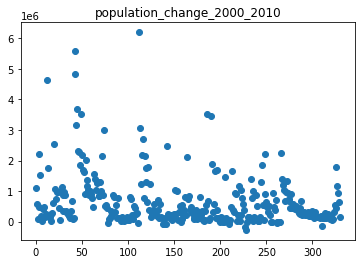

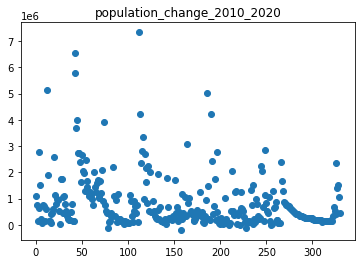

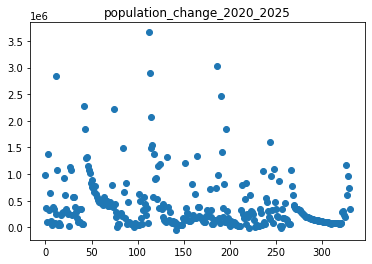

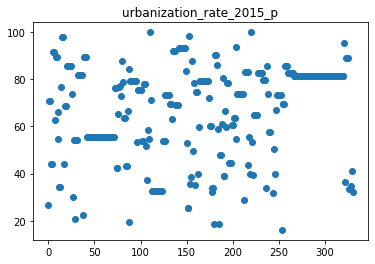

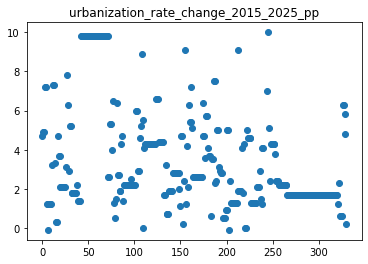

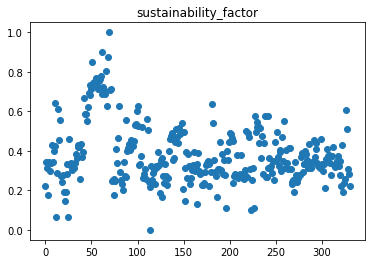

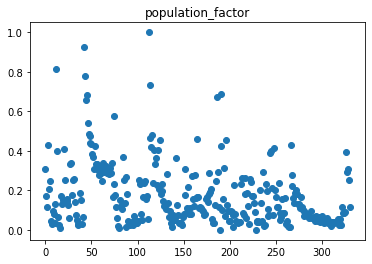

In [ ]:
for i in range(len(df4.columns)):
    plt.scatter(range(len(df4)), df4[df4.select_dtypes(include=['float64', 'int64']).columns].iloc[:, i])
    plt.title(df4.columns[i])
    plt.show()

No abnormal values that seem unrealistic.  Biggest outlier in population is Tokyo with its close to 40m inhabitants. Depending on which area is considered as land area for New York the high value of 11642 sq km can be reasoned. Research has proven that, depending on which source was taken for the dataset, the New York metropolitan area has approx. 9000 sq km, the metropolitan statistical area 17,405 sq km, so the value fits in.The same reasoning goes for the population density and none of the change or rate values seem abnormal.


### Detecting NaNs

Here we look for NaNs in the demographic columns

In [ ]:
df[df4.columns].isnull().sum()/len(df[df4.columns])

car_modeshare_p                          0.323263
public_transit_modeshare_p               0.314199
bicycle_modeshare_p                      0.444109
walking_modeshare_p                      0.398792
gasoline_pump_price_usdliter             0.000000
road_deaths_rate_per_1000                0.003021
population                               0.000000
land_area_sq_km                          0.000000
population_density_per_sq_km             0.000000
population_change_1990_2000              0.000000
population_change_2000_2010              0.000000
population_change_2010_2020              0.000000
population_change_2020_2025              0.000000
urbanization_rate_2015_p                 0.009063
urbanization_rate_change_2015_2025_pp    0.009063
sustainability_factor                    0.000000
population_factor                        0.000000
dtype: float64

Checking the correlation between df4 columns and the target variable (CO2 Emissions per Capita (metric tonnes)):

In [ ]:
for col in df4.columns:
    print(df4[df4.select_dtypes(include=['float64','int64']).columns][col].corr(df["co2_emissions_per_capita_metric_tonnes"]))

0.646258158457574
-0.48583437421569936
-0.13689647566815868
-0.5585235419878817
-0.1438976453860388
-0.33380740742582554
-0.11873430966689774
0.35091474143690143
-0.5317806739009265
-0.13524420844269902
-0.1522404383993335
-0.21675065763199855
-0.30072298023013366
0.5333329361333249
-0.30461952396543707
0.16890505757608057
-0.32884699458293876


- Car Modeshare (%) has 32.33 % NaNs (107) but is highly correlated (0.65) 

- Public Transit Modeshare (%) has 31.42 % NaNs (104) but is highly correlated (-0.49)

- Bicycle Modeshare (%) has most NaNs with 44.41% (147) but is still correlated to some extend and above our threshold(0.1:-0.1) at (-0.14)

- Walking Modeshare (%) has 39.88% of NaNs (132) but high correlation (0.56)

- All the other values have mostly none, maximum up to 3 NaNs, so we keep all of them and impute the average

### Copying the dataset for the exploratory part

In the following the sections we will fill out NaNs and drop columns of low importance for the prediction challenge. Therefore a copy of the dataset is made here, because these columns might still have value in the exploratory part. 

In [ ]:
df_exp = df.copy()

## 1.6 Look at the percentage of data missing and compare it to the correlation with CO2 emission

Because we want to predict the CO2 per capita in the cities we are checking this variable's correlation with the remaining ones. So e.g., if there is more than 20% NaN values and a correlation in the range [-0.1:0.1] then they should be dropped.

<BarContainer object of 77 artists>

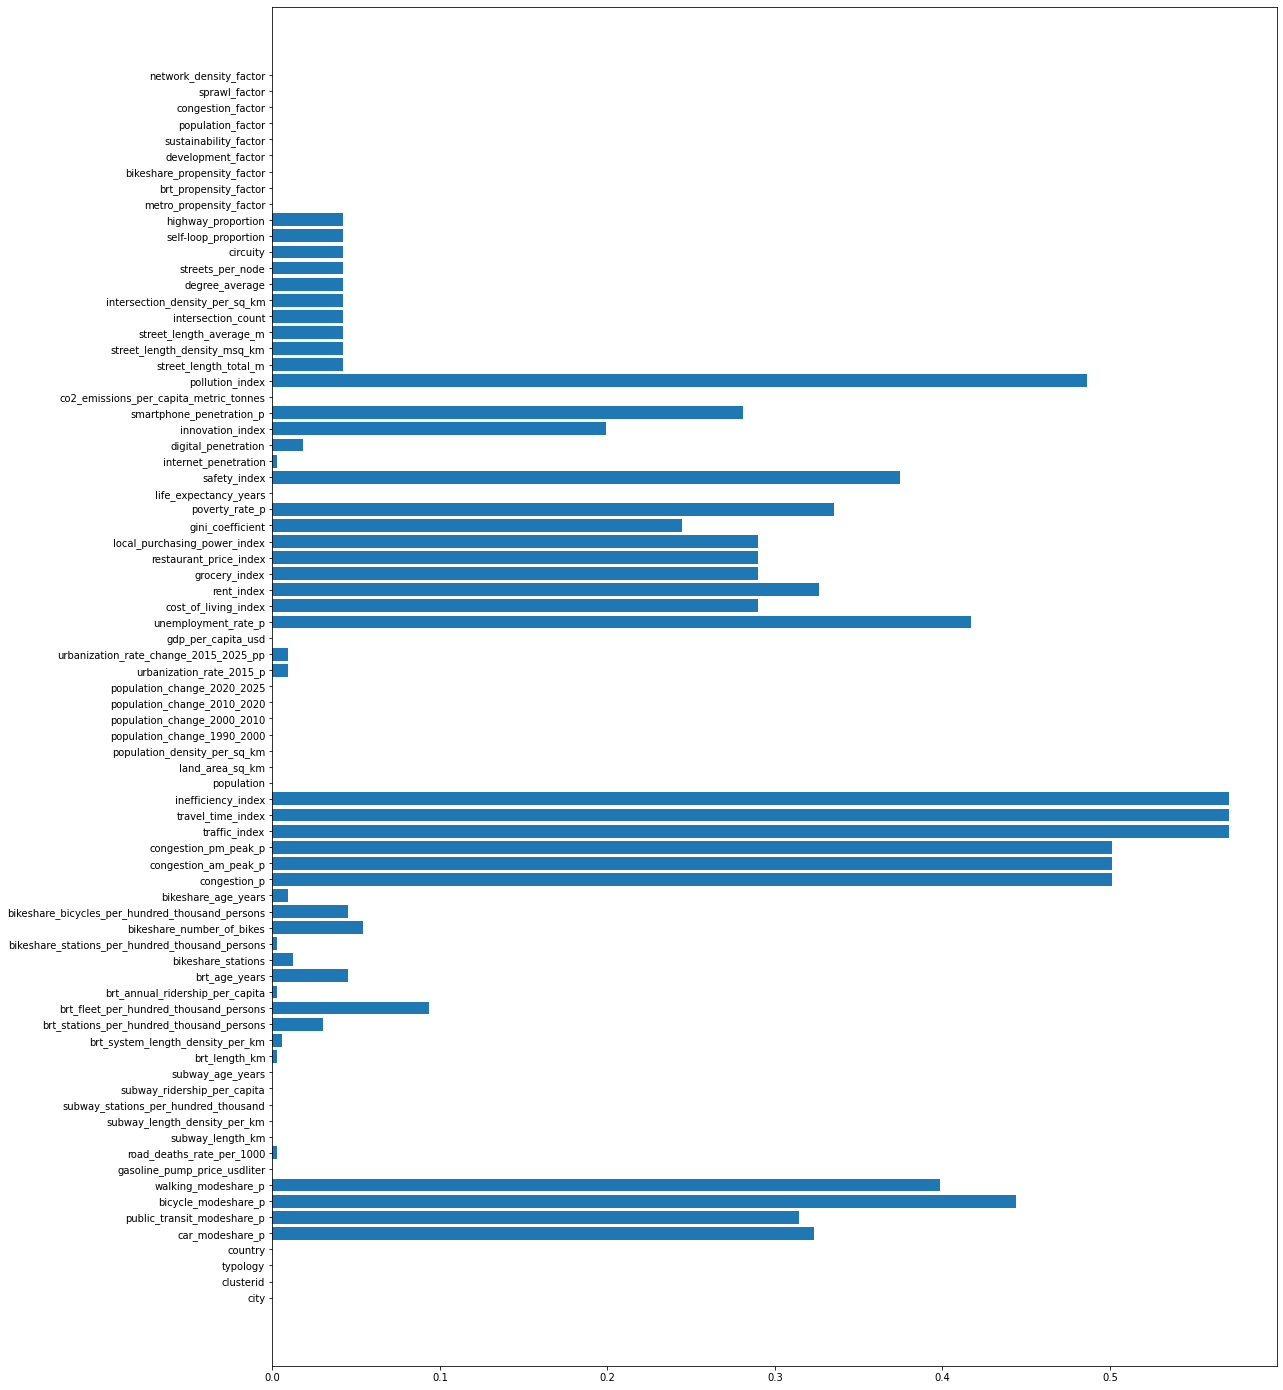

In [ ]:
corr = df.corr()
nans = df.isnull().sum()/len(df)
plt.subplots(figsize=(18,25))
plt.barh(nans.index, nans)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop=True, inplace=True)
missing_value_df.sort_values('percent_missing', inplace=True)


In [ ]:
col_miss = list(missing_value_df.loc[missing_value_df['percent_missing'] > 0.2, 'column_name'].values)
col_miss.append('co2_emissions_per_capita_metric_tonnes')
print(col_miss)

['internet_penetration', 'road_deaths_rate_per_1000', 'brt_length_km', 'brt_annual_ridership_per_capita', 'bikeshare_stations_per_hundred_thousand_persons', 'brt_system_length_density_per_km', 'bikeshare_age_years', 'urbanization_rate_change_2015_2025_pp', 'urbanization_rate_2015_p', 'bikeshare_stations', 'digital_penetration', 'brt_stations_per_hundred_thousand_persons', 'circuity', 'streets_per_node', 'highway_proportion', 'intersection_density_per_sq_km', 'intersection_count', 'street_length_average_m', 'street_length_density_msq_km', 'street_length_total_m', 'self-loop_proportion', 'degree_average', 'brt_age_years', 'bikeshare_bicycles_per_hundred_thousand_persons', 'bikeshare_number_of_bikes', 'brt_fleet_per_hundred_thousand_persons', 'innovation_index', 'gini_coefficient', 'smartphone_penetration_p', 'local_purchasing_power_index', 'restaurant_price_index', 'grocery_index', 'cost_of_living_index', 'public_transit_modeshare_p', 'car_modeshare_p', 'rent_index', 'poverty_rate_p', 's

In [ ]:
df[col_miss].corr()["co2_emissions_per_capita_metric_tonnes"]


internet_penetration                               0.603439
road_deaths_rate_per_1000                         -0.333807
brt_length_km                                     -0.034622
brt_annual_ridership_per_capita                   -0.108253
bikeshare_stations_per_hundred_thousand_persons    0.114131
brt_system_length_density_per_km                  -0.109062
bikeshare_age_years                                0.242348
urbanization_rate_change_2015_2025_pp             -0.304620
urbanization_rate_2015_p                           0.533333
bikeshare_stations                                 0.077070
digital_penetration                                0.655647
brt_stations_per_hundred_thousand_persons          0.005444
circuity                                           0.006813
streets_per_node                                   0.121177
highway_proportion                                 0.407361
intersection_density_per_sq_km                    -0.028969
intersection_count                      

In [ ]:
corr_co2 = df[col_miss].corr()["co2_emissions_per_capita_metric_tonnes"]
high_nan_corr = pd.DataFrame({'column_name': corr_co2.index,
                                 'corr_co2': corr_co2})
high_nan_corr.reset_index(drop=True, inplace=True)
high_nan_corr.sort_values('corr_co2', inplace=True)


In [ ]:
high_nan_corr.loc[(high_nan_corr.corr_co2 < 0.1)].loc[(high_nan_corr.corr_co2 > -0.1), 'column_name']

36                                     poverty_rate_p
2                                       brt_length_km
15                     intersection_density_per_sq_km
25             brt_fleet_per_hundred_thousand_persons
22                                      brt_age_years
16                                 intersection_count
11          brt_stations_per_hundred_thousand_persons
12                                           circuity
19                              street_length_total_m
24                          bikeshare_number_of_bikes
27                                   gini_coefficient
23    bikeshare_bicycles_per_hundred_thousand_persons
9                                  bikeshare_stations
17                            street_length_average_m
37                                       safety_index
Name: column_name, dtype: object

The following list of column names matches the above mentioned criteria and thus, can be deleted.

In [ ]:
high_nan_corr.loc[(high_nan_corr.corr_co2 < 0.1)].loc[(high_nan_corr.corr_co2 > -0.1), 'column_name'].values

array(['poverty_rate_p', 'brt_length_km',
       'intersection_density_per_sq_km',
       'brt_fleet_per_hundred_thousand_persons', 'brt_age_years',
       'intersection_count', 'brt_stations_per_hundred_thousand_persons',
       'circuity', 'street_length_total_m', 'bikeshare_number_of_bikes',
       'gini_coefficient',
       'bikeshare_bicycles_per_hundred_thousand_persons',
       'bikeshare_stations', 'street_length_average_m', 'safety_index'],
      dtype=object)

In [ ]:
df.drop(['brt_length_km', 'intersection_density_per_sq_km',
       'brt_fleet_per_hundred_thousand_persons', 'brt_age_years',
       'intersection_count', 'brt_stations_per_hundred_thousand_persons',
       'circuity', 'street_length_total_m', 'bikeshare_number_of_bikes',
       'gini_coefficient',
       'bikeshare_bicycles_per_hundred_thousand_persons',
       'bikeshare_stations', 'street_length_average_m', 'safety_index'], inplace=True, axis=1)

## 1.7 Fill NaN 

The remaining columns will be imputed with the respective column's mean.

In [ ]:
df.fillna((df.mean()), inplace=True)

In [ ]:
df.head()

,city,clusterid,typology,country,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_system_length_density_per_km,brt_annual_ridership_per_capita,bikeshare_stations_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,poverty_rate_p,life_expectancy_years,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index,street_length_density_msq_km,degree_average,streets_per_node,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
cityid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Kabul,1,Congested Emerging,Afghanistan,17.700000,49.600000,0.00000,32.700000,0.65,15.5,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,29.387879,46.654545,57.539394,170.634718,40.236268,181.698099,3650000,259,14100,631001,1088568,1083559,990357,26.7,4.7,617.9,38.000000,58.075018,28.26991,52.972621,52.35444,83.264188,24.600000,60.5,12.3,0.525138,39.681132,39.000000,0.693183,104.200000,4.185928e+09,5.230966,2.688829,0.000778,0.000000,0.079425,0.012067,0.373602,0.029561,0.221471,0.310268,0.707286,0.211824,0.330575
2,Algiers,1,Congested Emerging,Algeria,12.800000,28.700000,5.12587,55.800000,0.37,23.8,13.5,0.030682,0.380952,4.353741,6,0.0,0.0,0.0,0.0,29.387879,46.654545,57.539394,170.634718,40.236268,181.698099,3675000,440,8300,458131,573311,756928,368897,70.7,4.9,4827.7,10.000000,34.980000,10.09000,34.960000,26.43000,39.570000,20.731765,75.6,37.3,0.370000,28.000000,52.159664,3.514780,74.180000,5.322874e+09,5.112775,2.877538,0.002914,0.016953,0.127131,0.081778,0.375540,0.118424,0.344736,0.173201,0.656164,0.559870,0.380830
3,Oran,2,BusTransit Sprawl,Algeria,47.688694,25.999218,5.12587,18.270352,0.37,23.8,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,29.387879,46.654545,57.539394,170.634718,40.236268,181.698099,1015000,163,6200,59272,69838,144774,105265,70.7,4.9,4827.7,7.807409,58.075018,28.26991,52.972621,52.35444,83.264188,20.731765,75.6,37.3,0.370000,39.681132,52.159664,3.514780,60.474765,6.104866e+09,5.749214,3.120828,0.000635,0.017992,0.047502,0.088082,0.388473,0.231902,0.311532,0.114422,0.554905,0.689737,0.499762
4,Luanda,3,Congested Boomer,Angola,47.688694,25.999218,5.12587,18.270352,0.76,26.9,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,29.387879,46.654545,57.539394,170.634718,40.236268,181.698099,6955000,984,7100,1023451,2198754,2765042,1368858,44.1,7.2,6769.0,25.000000,147.990000,144.32000,131.280000,112.84000,25.090000,18.700000,52.4,29.5,0.110000,21.000000,52.159664,1.384496,60.474765,6.203790e+09,5.728079,2.973880,0.000528,0.000000,0.061402,0.087578,0.000000,0.485812,0.175425,0.429534,0.642123,0.331717,0.514084
5,Huambo,1,Congested Emerging,Angola,47.688694,25.999218,5.12587,18.270352,0.76,26.9,0.0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.0,29.387879,46.654545,57.539394,170.634718,40.236268,181.698099,590000,130,4600,251285,460941,627198,330972,44.1,7.2,3582.6,7.807409,58.075018,28.26991,52.972621,52.35444,83.264188,18.700000,52.4,29.5,0.110000,39.681132,52.159664,1.384496,60.474765,4.249366e+08,5.581714,3.023429,0.000205,0.000000,0.074822,0.037257,0.342958,0.043231,0.343601,0.206326,0.687646,0.45

There are other ways to impute NaN values, which we will tend to later. As part of our exploratory part we are imputing the NaN values by predicting the values via regression for all the modeshare columns, which we will use in our second exploratory part. 

## 1.8 Standardization 

To improve the perfomance and reliability in the prediction challenge a standardized dataset is created, by scaling the variables to be in the same numerical scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=['float64','int64']))
scaled_df = pd.DataFrame(scaled_df, columns=df.select_dtypes(include=['float64','int64']).columns)
scaled_df.head()

,clusterid,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p,gasoline_pump_price_usdliter,road_deaths_rate_per_1000,subway_length_km,subway_length_density_per_km,subway_stations_per_hundred_thousand,subway_ridership_per_capita,subway_age_years,brt_system_length_density_per_km,brt_annual_ridership_per_capita,bikeshare_stations_per_hundred_thousand_persons,bikeshare_age_years,congestion_p,congestion_am_peak_p,congestion_pm_peak_p,traffic_index,travel_time_index,inefficiency_index,population,land_area_sq_km,population_density_per_sq_km,population_change_1990_2000,population_change_2000_2010,population_change_2010_2020,population_change_2020_2025,urbanization_rate_2015_p,urbanization_rate_change_2015_2025_pp,gdp_per_capita_usd,unemployment_rate_p,cost_of_living_index,rent_index,grocery_index,restaurant_price_index,local_purchasing_power_index,poverty_rate_p,life_expectancy_years,internet_penetration,digital_penetration,innovation_index,smartphone_penetration_p,co2_emissions_per_capita_metric_tonnes,pollution_index,street_length_density_msq_km,degree_average,streets_per_node,self-loop_proportion,highway_proportion,metro_propensity_factor,brt_propensity_factor,bikeshare_propensity_factor,development_factor,sustainability_factor,population_factor,congestion_factor,sprawl_factor,network_density_factor
0,-1.273722,-1.278000e+00,1.405622e+00,-7.764889e-01,1.177434e+00,-0.952396,0.091162,-0.503691,-0.550847,-0.596834,-0.531937,-0.591446,-0.407812,-0.339012,-0.36477,-0.574446,0.0,0.0,0.0,-7.889204e-16,1.209757e-15,0.0,-0.134189,-0.606387,1.520460,0.075964,0.492649,0.247247,1.137354,-2.142190,0.435378,-1.106832,6.357265,-1.221179e-15,-6.399239e-16,1.606692e-15,6.825895e-16,4.379157e-16,3.772789e-01,-1.932075,-1.847670,1.527962e-15,0.000000,-0.77369,-1.026952,2.728701e+00,-3.288087e-01,2.568227e-01,-9.260001e-01,-5.783233e-01,-1.065459e+00,-0.596199,-1.090924,-0.320752,-1.457535,-1.050257,0.870857,1.140845,-1.238958,-0.539311
1,-1.273722,-1.486819e+00,1.608540e-01,1.345451e-16,3.062354e+00,-1.612493,1.046009,-0.328764,-0.101334,-0.285138,-0.441594,-0.372384,-0.407812,-0.339012,-0.36477,-0.574446,0.0,0.0,0.0,-7.889204e-16,1.209757e-15,0.0,-0.129352,-0.467320,0.417111,-0.123236,-0.097445,-0.069273,-0.074110,0.165428,0.510815,-0.918800,0.461666,-1.323080e+00,-1.091537e+00,-1.018262e+00,-1.245228e+00,-1.346462e+00,1.386021e-15,0.166417,-0.824068,-7.117060e-01,-1.731188,0.00000,-0.594771,8.552839e-01,-2.758058e-16,3.859912e-15,-6.537447e-15,4.697065e-16,-2.180432e-16,-0.351911,-0.619381,-0.296063,-1.123046,-0.243396,0.009377,0.870385,0.295176,-0.208077
2,-0.994885,3.028054e-16,8.463744e-16,1.345451e-16,-5.797904e-16,-1.612493,1.046009,-0.503691,-0.550847,-0.596834,-0.531937,-0.591446,-0.407812,-0.339012,-0.36477,-0.574446,0.0,0.0,0.0,-7.889204e-16,1.209757e-15,0.0,-0.644081,-0.680146,0.017623,-0.582845,-0.674043,-0.662476,-0.588030,0.165428,0.510815,-0.918800,0.000000,-1.221179e-15,-6.399239e-16,1.606692e-15,6.825895e-16,4.379157e-16,1.386021e-15,0.166417,-0.824068,-7.117060e-01,0.000000,0.00000,-0.594771,-8.868374e-16,2.261546e-01,1.382942e+00,1.193824e+00,-6.170181e-01,6.528113e-02,-0.759663,-0.576740,-0.131311,-0.695910,-0.460738,-0.360060,0.334677,0.867610,0.575807
3,-0.716048,3.028054e-16,8.463744e-16,1.345451e-16,-5.797904e-16,-0.693073,1.402639,-0.503691,-0.550847,-0.596834,-0.531937,-0.591446,-0.407812,-0.339012,-0.36477,-0.574446,0.0,0.0,0.0,-7.889204e-16,1.209757e-15,0.0,0.505353,-0.049352,0.188832,0.528187,1.764080,1.876675,1.875198,-1.229632,1.378351,-0.832091,3.620022,5.151098e+00,6.967747e+00,4.426753e+00,2.905301e+00,-1.792671e+00,-1.981633e-01,-3.057757,-1.143432,-1.904470e+00,-2.768615,0.00000,-0.921065,-8.868374e-16,2.547636e-01,1.337017e+00,4.727506e-01,-6.460040e-01,-1.065459e+00,-0.688488,-0.580149,-5.080281,0.259822,-1.351661,1.620455,0.796102,-0.710488,0.670207
4,-1.273722,3.028054e-16,8.463744e-16,1.345451e-16,-5.797904e-16,-0.693073,1.402639,-0.503691,-0.550847,-0.596834,-0.531937,-0.5914

In [ ]:
from matplotlib.pyplot import figure

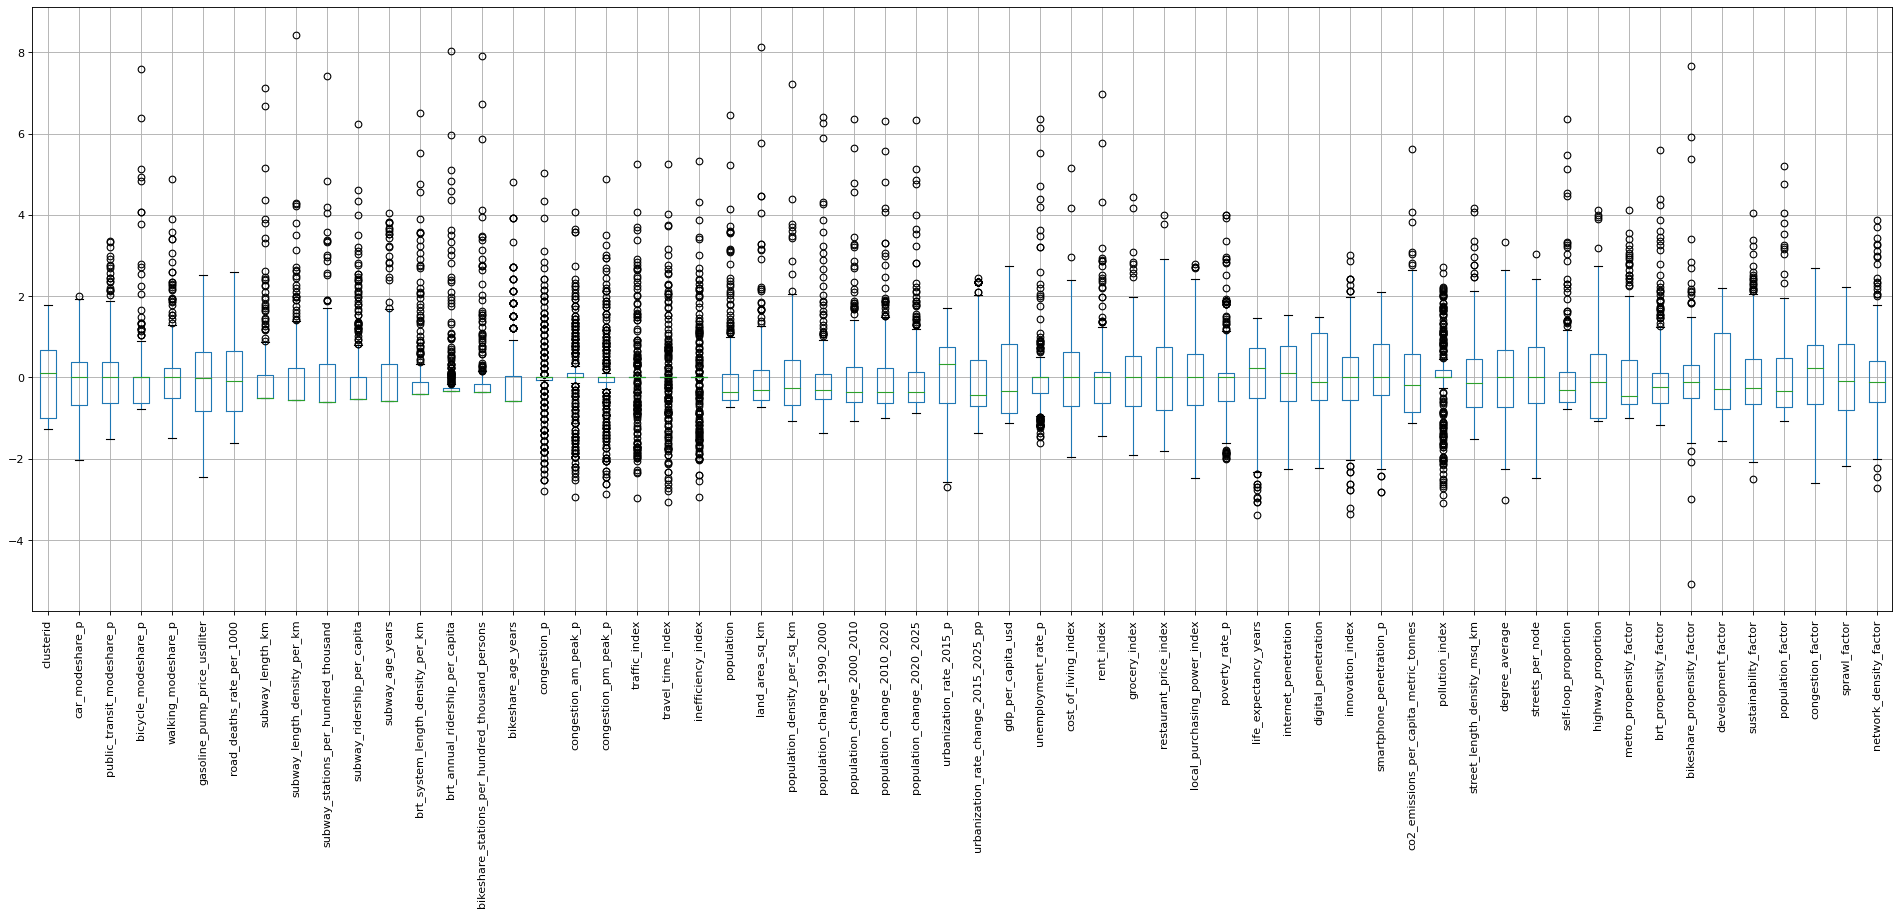

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
scaled_df.boxplot(rot=90)

The boxplot on the standardized dataset shows that the scaling seems to work. Some of the columns show very narrow mid quartiles which could be a result of filling NaNs with the mean of the column, which would compress the boxplot.

# 2 Prediction challenge

Predict the ’CO2 Emissions per Capita (metric tonnes)' for each city, conditioned on highly correlated variables, except for pollution index.

## 2.1 Prediction challenge part 1

The first part of the prediction challenge aims at predicting CO2 emissions by training on the first 75 % of the dataset and testing on the last 25 %. The first task is to select prediction features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
print("Correlation with co2_emissions_per_capita_metric_tonnes")
corr['co2_emissions_per_capita_metric_tonnes'][corr['co2_emissions_per_capita_metric_tonnes']>0.60].drop('co2_emissions_per_capita_metric_tonnes')


Correlation with co2_emissions_per_capita_metric_tonnes


car_modeshare_p                 0.646258
gdp_per_capita_usd              0.701319
local_purchasing_power_index    0.634353
internet_penetration            0.603439
digital_penetration             0.655647
development_factor              0.706203
Name: co2_emissions_per_capita_metric_tonnes, dtype: float64

We use the highest correlated variables as features. We add some others that are high correlated or interesting to investigate when looking at CO2 emission like e.g. the gasoline_pump_price_usdliter.

In [ ]:
X = scaled_df[['life_expectancy_years', 'car_modeshare_p','urbanization_rate_2015_p', 'gasoline_pump_price_usdliter', 'traffic_index', 'population_density_per_sq_km', 'gdp_per_capita_usd', 'internet_penetration', 'digital_penetration', 'local_purchasing_power_index', 'car_modeshare_p', 'smartphone_penetration_p', 'development_factor', 'congestion_factor']]
y = scaled_df[["co2_emissions_per_capita_metric_tonnes"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

To find the perfect parameters for our SVR model we use a Grid Search cross validation, which gives us an indication on how to tune our parameters:


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('rbf', 'linear'), 'C':[1, 2], 
              "epsilon": [0.01, 0.1, 0.5], "degree":[1, 2], "shrinking":[True]}
svc = SVR()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train.squeeze())
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)
print(clf.best_estimator_.score(X_test, y_test.squeeze()))

0.3975812457575354
{'C': 2, 'degree': 1, 'epsilon': 0.1, 'kernel': 'rbf', 'shrinking': True}
SVR(C=2, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.5387771271896031


Thanks to the grid search cross validation, we know which parameters perform the best and we can select them for our model.

In [ ]:
from sklearn.svm import SVR
svr = make_pipeline(SVR(C=2.0, epsilon=0.1, kernel="rbf", degree=1, gamma="auto"))
svr.fit(X_train, y_train.squeeze())
print(svr.score(X_test, y_test.squeeze()))

0.5597109898179223


This looks good, we achieve a solid score of 0.55971!

## 2.2 Prediction challenge part 2

In the second part of the prediction challenge we will investigate the same feature and target variables, we will do a different train and test split though. Here the test set consists of all the countries belonging to North and South America and the train set consists of all the countries in the rest of the world.

We have to specify which countries belong to North and South America. In the following we create a set for all the countries within the Americas.

In [ ]:
countries = {"Argentina", "Bolivia", "Brazil", "Canada", "Chile", "Colombia", "Costa Rica", "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Haiti", "Honduras", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Puerto Rico", "United States", "Uruguay", "Venezuela"}

We create df_am for all the countries that belong to the Americas.

In [ ]:
df_am = df.loc[df["country"].isin(countries)]

df_row includes the countries in the rest of the world

In [ ]:
df_row = df.loc[~df["country"].isin(countries)]

In [ ]:
print(df_am.shape)
print(df_row.shape)

(105, 63)
(226, 63)


We have 105 rows with countries that belong to either North America or South America and 226 rows  with countries spread out over the rest of the world.

We use the same predictor and target variables as above. Our test set corresponds to the countries in North America and South America. The train set consists of all the other countries.

In [ ]:
X_train = df_row[['gdp_per_capita_usd', 'internet_penetration', 'digital_penetration', 'local_purchasing_power_index', 'car_modeshare_p', 'smartphone_penetration_p', 'development_factor', 'congestion_factor']]
X_test = df_am[['gdp_per_capita_usd', 'internet_penetration', 'digital_penetration', 'local_purchasing_power_index', 'car_modeshare_p', 'smartphone_penetration_p', 'development_factor', 'congestion_factor']]
y_train = df_row[["co2_emissions_per_capita_metric_tonnes"]]
y_test = df_am[["co2_emissions_per_capita_metric_tonnes"]]

In the last part we use a Random Forest Regressor again to predict the co2 emissions per capita based on the new train-test split.

In [ ]:
rfr2 = RandomForestRegressor(max_depth=None, random_state=0)
rfr2.fit(X_train, y_train)
rfr2.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.4348048831338452

With this model we achieve a R^2 of 0.4348. Not a very high score, indicating that it certainly makes a difference how you split your train and test set. To get a high score and a model that performs well, you need a well distributed train-test-split, which does not strictly split based on geographic data or other variables, but rather does a random split and mixes them up, so the generizability of the prediction model increases.

## 2.3 Transferability
In the following we are going to discuss the transferability of this particular train test split, is it generalizable and how would a prediction on an entirely new datapoint look like? 

Splitting the dataset continent wise, into a testset consisting of all the countries within North and South America and a trainset with all the other countries, can lead to imprecise results for certain predictions. Let us assume that we want to predict the CO2 emissions per capita for a new city in Chile. If we train our model only on countries within the rest of the world and our test set only corresponds partly to the target variable, our prediction could be biased, since the CO2 emissions per capita vary throughout the world. For example, the test set is potentially heavily skewed. A quick search shows that the United States accounts for a far larger CO2 emissions than other countries in the Americas.

# 3 Exploratory part


1.4 million people died worldwide in 2016 due to road injuries, which makes it the 8th most common cause of death globally ([source](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)). 

The exploratory part of this notebook investigates the relationships in the dataset between mode of transport and road safety to find out the strength of the relationships and see what other factors affect this. 

First, we will fill out the NaNs in modeshare to get a fuller picture of the mode of transport in the cities.

Second, we will predict the number of road deaths with a neural network, build in keras, using variables related to the shape of the transport network, to see whether this has an influence on the modes of transport chosen and road safety. We could provide predictions on how many road deaths are anticipated in new cities, which are not in the dataset or even when doing urban planning this could help immensely to decrease the number of fatal accidents by evaluating the predictions for multiple infrastructure layouts.

Lastly, we will use clustering to look for patterns between the predicted modeshare, road safety and other features.

## Exploratory part 1: Completing modeshare columns with imputation by regression

First, we need complete data in the modeshare columns. Therefore we will fill out the NaNs in these columns using a random forest regressor by predicting them with highly correlated features. 

In [ ]:
# selecting the modeshare columns 
modeshare = df_exp.iloc[:,4:8]
mode = modeshare.columns
modeshare

,car_modeshare_p,public_transit_modeshare_p,bicycle_modeshare_p,walking_modeshare_p
cityid,,,,
1,17.7,49.6,0.0,32.7
2,12.8,28.7,NaN,55.8
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
...,...,...,...,...
327,11.0,6.0,NaN,NaN
328,8.0,10.0,2.0,NaN
329,NaN,NaN,NaN,NaN


Here we can see the percentage of nans in the modeshare columns. This needs to be filled out to make the modeshare columns more suitable for our purposes. 

In [ ]:
modeshare_nan = modeshare.isnull()
modeshare_data = modeshare.notna()
modeshare.isnull().sum()/len(modeshare)

car_modeshare_p               0.323263
public_transit_modeshare_p    0.314199
bicycle_modeshare_p           0.444109
walking_modeshare_p           0.398792
dtype: float64

In [ ]:
# splitting the dataset into a section with and without NaNs
car_nan = modeshare[mode[0]][modeshare_nan[mode[0]]] # to be filled
car_data = modeshare[mode[0]][modeshare_data[mode[0]]] # target

public_nan = modeshare[mode[1]][modeshare_nan[mode[1]]]
public_data = modeshare[mode[1]][modeshare_data[mode[1]]]

bike_nan = modeshare[mode[2]][modeshare_nan[mode[2]]]
bike_data = modeshare[mode[2]][modeshare_data[mode[2]]]

walk_nan = modeshare[mode[3]][modeshare_nan[mode[3]]]
walk_data = modeshare[mode[3]][modeshare_data[mode[3]]]

In [ ]:
# Making a correlation matrix from the preserved dataset
corr_exp = df_exp.corr()

The following function, predict_y, chooses the four features with the higehst correlation with the target variable, and uses those as prediction features in a random forest regressor. This function was created to get a proxy for the best prediction quality that we can hope to achieve for NaNs.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def predict_y(target):
  c = corr_exp[target.name].drop(target.name) # finding the correlation vector for the target variable
  i = 1
  while True: # find at least 4 features with the highest correlation
    high_corr = c[abs(c)>i]
    i = i -0.01
    if len(high_corr) >= 4:
      break
  # making X (prediction feature matrix)
  pred = df_exp.loc[target.index][high_corr.keys()].dropna()
  # updating y to be of same shape
  target=target[pred.index]
  X_train, X_test, y_train, y_test = train_test_split(pred, target, random_state = 2) 
  rfr = RandomForestRegressor(max_depth=None, random_state=2)
  rfr.fit(X_train, y_train)
  return rfr.score(X_test, y_test)

print("This is the highest prediction accuracy we can hope for using this regressor:")
print("For car modeshare: ", predict_y(car_data))
print("For public transport modeshare: ", predict_y(public_data))
print("For bike modeshare: ", predict_y(bike_data))
print("For walking modeshare: ", predict_y(walk_data))

This is the highest prediction accuracy we can hope for using this regressor:
For car modeshare:  0.9336376269619486
For public transport modeshare:  0.8662128903747417
For bike modeshare:  0.44299986436217487
For walking modeshare:  0.5695014570438939


This regresion method seems to yield decent results, especially for the car_modeshare, which is particularly interesting to us. Now we can try to fill in the NaN values using this general methodology

Although, we might not be able to fill all the NaNs with the same features as in the previous function, because the four features with the highest correlation don't all have values at all of the same indices as where we find NaNs. Therefore, we will now first remove the columns which don't have values at all the indices where we find NaNs, and then choose four features starting with the highest correlated. This will most likely not yield as good a result, because we now have a limited feature set to choose from.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
def predict_na(train, target):
  c = corr_exp[train.name].drop(train.name) # finding the correlation vector for the target variable
  # removing keys from corr vector if no data for target index
  for k in c.keys():
    if df_exp[k].loc[target.index].isnull().sum() != 0:
      c = c.drop(k)
  i = 1
  while True: # find at least 4 features with the highest correlation
    high_corr = c[abs(c)>i]
    i = i -0.01
    if len(high_corr) >= 4:
      break
  # training set
  train_X = df_exp.loc[train.index][high_corr.keys()]
  # making X (prediction feature matrix)
  pred = df_exp.loc[target.index][high_corr.keys()]
  # necessary to test train split? or just train on whole shabang ??
  X_train, X_test, y_train, y_test = train_test_split(train_X, train, random_state = 2)
  rfr = RandomForestRegressor(max_depth=None, random_state=2)
  rfr.fit(X_train, y_train)
  print(rfr.score(X_test, y_test))
  return rfr.predict(pred)

predict_na(car_data, car_nan)

0.7939777693308889


array([29.443 , 21.5235, 17.31  , 26.777 , 25.482 , 15.665 , 28.163 ,
       15.094 , 27.863 , 28.336 , 12.687 , 12.246 , 13.246 , 15.641 ,
       47.682 , 29.144 , 23.421 , 30.289 , 29.144 , 21.69  , 31.333 ,
       31.13  , 30.78  , 32.42  , 34.873 , 47.906 , 48.098 , 14.0457,
       17.6094, 48.124 , 24.637 , 15.363 , 13.773 , 45.894 , 43.476 ,
       26.1752, 19.9312, 17.9949, 25.642 , 25.3964, 14.407 , 13.948 ,
       14.336 , 19.5554, 40.088 , 18.125 , 16.84  , 12.278 , 14.434 ,
       36.605 , 36.605 , 30.191 , 49.21  , 28.51  , 13.289 , 49.681 ,
       25.149 , 31.302 , 14.486 , 50.364 , 15.3   , 31.9644, 19.7599,
       20.9014, 13.285 , 12.052 , 15.402 , 13.94  , 27.686 , 44.948 ,
       14.873 , 44.124 , 12.855 , 15.461 , 43.411 , 21.7916, 49.69  ,
       53.22  , 45.362 , 49.208 , 47.396 , 49.497 , 46.239 , 13.927 ,
       15.941 , 43.647 , 48.621 , 44.786 , 48.45  , 79.812 , 22.457 ,
       15.855 , 16.774 , 46.549 , 14.523 , 47.59  , 46.662 , 49.3444,
       50.4157, 20.1

Now we can fill a dataframe with the predicted values.

In [ ]:
car_fill = pd.Series(predict_na(car_data, car_nan))
public_fill = pd.Series(predict_na(public_data, public_nan))
bike_fill = pd.Series(predict_na(bike_data, bike_nan))
walk_fill = pd.Series(predict_na(walk_data, walk_nan))

# because dataframe views are mutable
df_filled = df_exp.copy()

# not working due to problem with indices
#df_filled[car_nan.name].fillna(car_fill, inplace=True)
#df_filled[public_nan.name].fillna(public_fill, inplace=True)
#df_filled[bike_nan.name].fillna(bike_fill, inplace=True)
#df_filled[walk_nan.name].fillna(walk_fill, inplace=True)

# necessary because index is lost due to rfr.predict in predict_na function returns ndarray
for i in range(len(car_nan)):
  df_filled[car_nan.name].loc[car_nan.index[i]] = car_fill[i]

for i in range(len(public_nan)):
  df_filled[public_nan.name].loc[public_nan.index[i]] = public_fill[i]

for i in range(len(bike_nan)):
  df_filled[bike_nan.name].loc[bike_nan.index[i]] = bike_fill[i]

for i in range(len(walk_nan)):
  df_filled[walk_nan.name].loc[walk_nan.index[i]] = walk_fill[i]

0.7939777693308889
0.4707309530733442
0.501049372491774
0.3608291129174165


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


As can be seen below, the modeshare columns are now filled and contain 0 NaNs.

In [ ]:
df_filled[mode].isnull().sum()

car_modeshare_p               0
public_transit_modeshare_p    0
bicycle_modeshare_p           0
walking_modeshare_p           0
dtype: int64

But as can be seen on the plot below, a number of cities now have modeshares totalling more than 100 %, which is nonsensical. Also, cities have modeshars equalign less than 100 %. Whether this is due to cities also having other modes of transport is uncertain, it is therefore not recommended to scale this numbers upwards to equal 100. 
The cities with modeshares equalling above 100 could be scaled to total at least 100. What we will do in part 3 is to define a new categorical variable, based on the transport more with the highest percentage, and since scaling doesn't affect proportions this is left alone for this purpose.

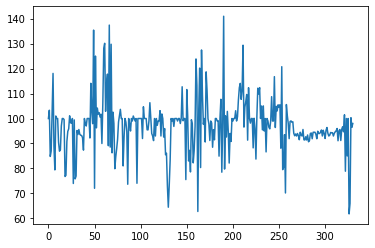

In [ ]:
sums = [df_filled[mode].iloc[i].sum() for i in range(len(df_filled))]
plt.plot(sums)
plt.show()

Impute the rest of the NaNs in the other columns with their mean.

In [ ]:
df_exp = df_exp.replace(r'^\s*$', np.nan, regex=True)   # why this? 
df_exp.fillna((df_exp.mean()), inplace=True)

## Exploratory part 2: Neural network
In the following part we will build a neural network to investigate how the modeshare and infrastructure influence the road deaths per 1000 and try to predict those.

In [118]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

Specify feature and target variable and transform into array for a smooth working train test split.

In [119]:
X = df_exp[["car_modeshare_p",	"public_transit_modeshare_p",	"bicycle_modeshare_p",	"walking_modeshare_p", "street_length_total_m",	"street_length_density_msq_km",	"street_length_average_m",	"intersection_count",	"intersection_density_per_sq_km",	"degree_average",	"streets_per_node",	"circuity",	"self-loop_proportion",	"highway_proportion",	"metro_propensity_factor",	"brt_propensity_factor",	"bikeshare_propensity_factor"]]
y = df_exp[["road_deaths_rate_per_1000"]]

X = np.array(X)
y = np.array(y)

Let us first use a random forest regressor, to see if we are on the right track:

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=None, random_state=0)
rfr.fit(x_train, Y_train)
print("Random forest score:")
print(rfr.score(x_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random forest score:
0.4876800773228085


This is a decent score, we can infer from here that we can use this model to predict road_deaths_rate_per_1000.

Now we prepare our data for a prediction with a neural network. We split the dataset into 75% train, 15% validation and 10% test set.
As feature variables we use all modeshare, infrastructure and city shape variables that are available in the dataset, giving us and overall indication on how cities infrastructure is built and how they are developed in terms of mobility.

In [122]:
X = df_exp[["car_modeshare_p",	"public_transit_modeshare_p",	"bicycle_modeshare_p",	"walking_modeshare_p", "street_length_total_m",	"street_length_density_msq_km",	"street_length_average_m",	"intersection_count",	"intersection_density_per_sq_km",	"degree_average",	"streets_per_node",	"circuity",	"self-loop_proportion",	"highway_proportion",	"metro_propensity_factor",	"brt_propensity_factor",	"bikeshare_propensity_factor"]]
y = df_exp[["road_deaths_rate_per_1000"]]

X = np.array(X)
y = np.array(y)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
# train is now 75% of the entire data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
# test is now 10% of the initial data set
# validation is now 15% of the initial data set

We standardize df_exp:

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_val = scaler.transform(y_val)
y_test = scaler.transform(y_test)

Now we are ready to build our neural net in keras and fit it to our training data:

In [125]:
model = Sequential()
model.add(Dense(15, input_dim=17, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='tanh'))
# compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
# fit the model on the dataset
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.1921 - mae: 0.8740 - val_loss: 0.7405 - val_mae: 0.6907
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.0879 - mae: 0.8673 - val_loss: 0.7292 - val_mae: 0.6838
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1688 - mae: 0.9210 - val_loss: 0.7191 - val_mae: 0.6777
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1688 - mae: 0.8952 - val_loss: 0.7096 - val_mae: 0.6720
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1538 - mae: 0.8724 - val_loss: 0.7006 - val_mae: 0.6671
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.1874 - mae: 0.8660 - val_loss: 0.6920 - val_mae: 0.6643
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 1.2756 - mae: 0.9404 - val_loss: 0.6838 - val_mae: 0.6616
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.2393 - mae: 0.9

Evaluate our model:

In [116]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 0.4148525595664978 / Test accuracy: 0.5277363061904907


Not great and definitely room for improvement, but workable with for now! 

Now we can use our model, to make predictions about how many road deaths per 1000 occur, depending on the infrastructure and mobility of a city.

In [126]:
model.predict(X_train, verbose=1)

8/8 [==============================] - 0s 1ms/step


array([[ 0.3081742 ],
       [ 0.71445984],
       [ 0.5369509 ],
       [ 0.6615114 ],
       [ 0.8719777 ],
       [-0.6560825 ],
       [ 0.01737598],
       [-0.20675687],
       [ 0.6159524 ],
       [ 0.2557002 ],
       [ 0.6098467 ],
       [-0.8895114 ],
       [ 0.5065664 ],
       [ 0.4262709 ],
       [-0.80413574],
       [-0.904085  ],
       [ 0.14971709],
       [-0.96351   ],
       [-0.4361359 ],
       [ 0.2538508 ],
       [-0.46013218],
       [-0.59200406],
       [-0.97597796],
       [-0.30123276],
       [ 0.32133403],
       [ 0.8654485 ],
       [ 0.22963981],
       [ 0.50979406],
       [ 0.41011316],
       [ 0.7546477 ],
       [-0.7430444 ],
       [-0.56139344],
       [ 0.50849396],
       [ 0.12221684],
       [-0.5139964 ],
       [-0.92543983],
       [ 0.49884954],
       [ 0.88344866],
       [ 0.6217031 ],
       [ 0.6994194 ],
       [ 0.6783208 ],
       [-0.8334414 ],
       [ 0.77736086],
       [ 0.3469385 ],
       [-0.87797254],
       [-0

Now we convert the data back from standardized into the real values. We take the first city in the dataset:

In [127]:
print(df_exp.std()["road_deaths_rate_per_1000"])
print(df_exp.mean()["road_deaths_rate_per_1000"])
result = (float(0.3081742) * float(8.705649691280437)) + float(14.707575757575746)
print(result)

print(df["road_deaths_rate_per_1000"])

8.705649691280437
14.707575757575746
17.39043238666634
cityid
1      15.5
2      23.8
3      23.8
4      26.9
5      26.9
       ... 
327    24.5
328    24.5
329    21.5
330    24.7
331    28.2
Name: road_deaths_rate_per_1000, Length: 331, dtype: float64


The first city with cityid 1 is Kabul in Afghanistan with a road death rate (per 1000) of 15.5, here our model predicts 17.39 road deaths. This is pretty accurate and a good indication. Let us try the second city:

In [128]:
print(df_exp.std()["road_deaths_rate_per_1000"])
print(df_exp.mean()["road_deaths_rate_per_1000"])
result = (float(0.71445984) * float(8.705649691280437)) + float(14.707575757575746)
print(result)

8.705649691280437
14.707575757575746
20.927412843104015


Algiers in Algeria has a road deaths rate (per 1000) of 23.8, our model predicts here 20.93. The model seems to go in the right direction and is actually able to predict how many road deaths approximately will occur in a city, just based on its infrastructure, shape and mobility patterns. This is very interesting and valuable when it comes to making cities safer and could help a lot in urban planning by providing a call for action. 

## Exploratory part 3: clustering

This section investigates relationships between road deaths, being a rich and developed city, the dominant modeshare and urban typology. 

First, we will need to prepare our data for this purpose. To create a definition of rich, mid-income and poor city, clustering is performed based on the features gdp per capita, life expectancy and co2 emissions per capita. Notice that the clustering is performed on a scaled version of the data, while the plots are created with the original data. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import axes3d

cluster_df = df_exp.filter(['co2_emissions_per_capita_metric_tonnes','life_expectancy_years','gdp_per_capita_usd'], axis=1)
#cluster_df["road_deaths_rate_per_1000"].fillna((cluster_df["road_deaths_rate_per_1000"].mean()), inplace=True)
scaler = StandardScaler()
scaled_cluster_df = scaler.fit_transform(cluster_df)
modeshare_filled = df_filled.iloc[:,4:8]
mode = modeshare_filled.columns

from sklearn.preprocessing import LabelEncoder
main_transport = modeshare_filled.idxmax(axis=1).str.slice(stop=-12)
le = LabelEncoder()
le.fit(main_transport)
main_transport_encoded = le.transform(main_transport)
cluster = KMeans(n_clusters=3, random_state=1).fit(scaled_cluster_df)

cluster_df = cluster_df.join(pd.DataFrame(scaled_cluster_df, columns=['scaled_co2','scaled_life','scaled_gdp']))
cluster_df = cluster_df.join(pd.Series(cluster.labels_,name='cluster',index=list(range(1,332))))
cluster_df = cluster_df.join(df['city'])
cluster_df = cluster_df.join(df['clusterid'])
cluster_df = cluster_df.join(df["road_deaths_rate_per_1000"])
cluster_df = cluster_df.join(pd.Series(main_transport,name='main_transport'))
cluster_df = cluster_df.join(pd.Series(main_transport_encoded,name='main_transport_encoded',index=list(range(1,332))))

In [ ]:
le.classes_

array(['bicycle', 'car', 'public_transit', 'walking'], dtype=object)

On the plot below we can see strong relationships between the three variables chosen for the clustering of rich, mid and poor cities. 

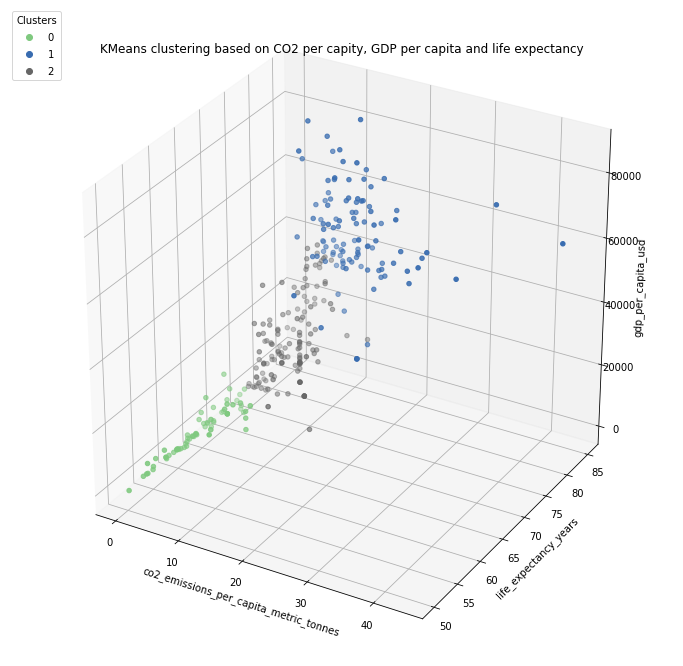

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
ax.set_xlabel(cluster_df.columns[0])
ax.set_ylabel(cluster_df.columns[1])
ax.set_zlabel(cluster_df.columns[2])

scatter = ax.scatter(cluster_df['co2_emissions_per_capita_metric_tonnes'],	cluster_df['life_expectancy_years'],	cluster_df['gdp_per_capita_usd'], c=cluster_df['cluster'],cmap='Accent')
plt.title("KMeans clustering based on CO2 per capity, GDP per capita and life expectancy")
legend = ax.legend(loc=2,*scatter.legend_elements(), title='Clusters')
plt.show()

Here we can see the divide of the clusters in rich, mid and poor.
Cluster 0 is for the poor cities.
Cluster 1 is for the rich cities.
Cluster 2 is for the mid cities.


Now if we plot gdp per capita against road deaths, and use the clusters for colouring, it can clearly be seen that poorer cities in general have more annual deaths on the road per capita compared to richer cities.

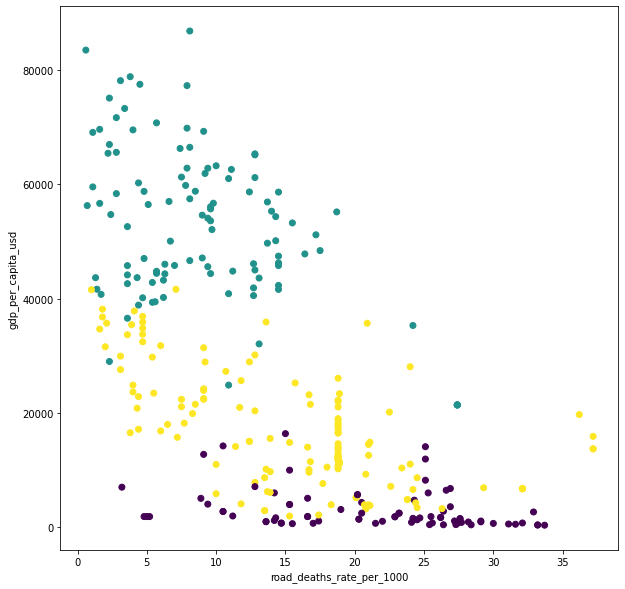

In [ ]:
xx = "road_deaths_rate_per_1000"
#'life_expectancy_years'
#'co2_emissions_per_capita_metric_tonnes'
yy = 'gdp_per_capita_usd'
#'life_expectancy_years'
#"road_deaths_rate_per_1000"
fig = plt.figure(figsize = (10, 10))
aa = fig.add_subplot(111)
aa.set_xlabel(xx)
aa.set_ylabel(yy)
sc = plt.scatter(df[xx],	df[yy],c=cluster_df['cluster'])
legend = ax.legend(loc=2,*sc.legend_elements(), title='Clusters')
#c=cluster_df['cluster']
#c=cluster_df['main_transport_encoded']

If we now look at the next two plots it can be seen that richer countries (cluster 1) it can be seen that they are more likely to drive cars (transport mode 1) while poorer countries (cluster 0) are more likely to walk (transport mode 3) or take public transport (transport mode 2). Mid income cities (cluster 2) shows a mix of transport modes. 

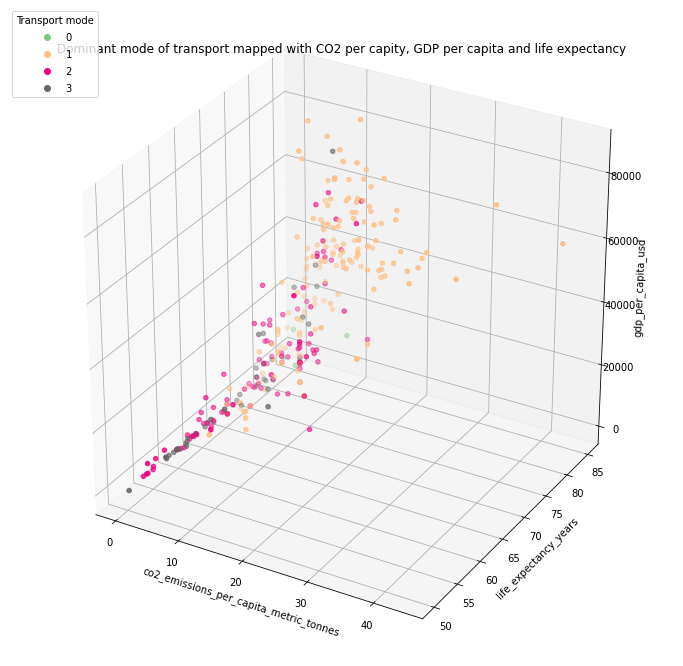

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
ax.set_xlabel(cluster_df.columns[0])
ax.set_ylabel(cluster_df.columns[1])
ax.set_zlabel(cluster_df.columns[2])

scatter3 = ax.scatter(cluster_df['co2_emissions_per_capita_metric_tonnes'],	cluster_df['life_expectancy_years'],	cluster_df['gdp_per_capita_usd'], c=cluster_df['main_transport_encoded'],cmap='Accent', label=cluster_df['main_transport_encoded'])
plt.title("Dominant mode of transport mapped with CO2 per capity, GDP per capita and life expectancy")
legend = ax.legend(loc=2,*scatter3.legend_elements(), title='Transport mode')

The clusters in this plot has the following classes as transport modes:
Transport mode 0 is for bicycle.
Transport mode 1 is for car.
Transport mode 2 is for public transport.
Transport mode 3 is for walking.

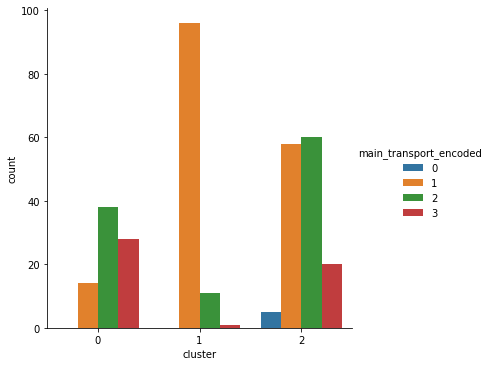

In [ ]:
sn.catplot(hue='main_transport_encoded', x='cluster', kind="count", data=cluster_df)

If we then compare the transport modes of the cities and look at the road deaths in the cities, we can see that the rich cities(cluster 1) have more road deaths due to cars but have far less road deaths in total. This makes sense when thinking of the distribution of transport in the rich cities that are dominated by cars. The opposite is however true in the poor and mid income cities. Here it is seen that there are more road deaths by public transport and walking even though cars are not that far behind. This might be due to the relationship that a richer city tend to drive cars more often and in general have fewer road deaths. So in the poorer cities it could seem safer to be in a car compared to the richer cities. This could be because of the hectic traffic in poorer parts of the world and then the car will be the most robust thing in a traffic accident, while in the richer countries it is more often that it is car on car traffic accidents and therefore more deaths in cars typically.


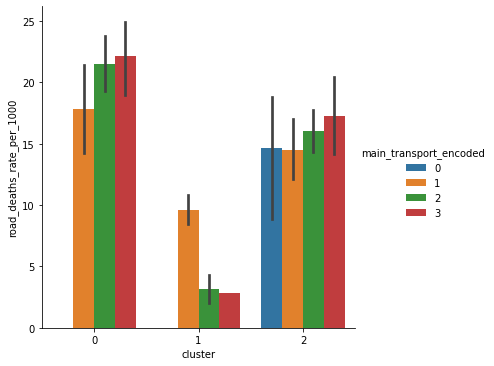

In [ ]:
sn.catplot(hue='main_transport_encoded', y="road_deaths_rate_per_1000", x='cluster', kind="bar", data=cluster_df)

If we now compare this view of the with the spread of urban typologies, it can be seen that the typoelogies is somewhat split between the richer and poorer cities. This can also be seen on the urban typology map ([source](http://web.mit.edu/afs/athena.mit.edu/org/i/its-lab/www/dashboard/new%20dashboard/map.html)), where the typologies are somewhat divided between the countries, which also somewhat coincides with being rich or poor.

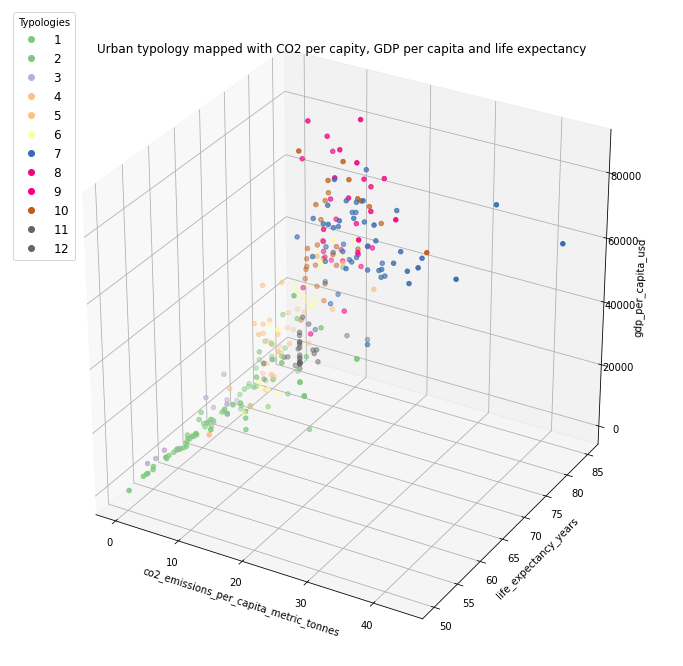

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")
ax.set_xlabel(cluster_df.columns[0])
ax.set_ylabel(cluster_df.columns[1])
ax.set_zlabel(cluster_df.columns[2])

scatter2 = ax.scatter(cluster_df['co2_emissions_per_capita_metric_tonnes'],	cluster_df['life_expectancy_years'],	cluster_df['gdp_per_capita_usd'], c=cluster_df['clusterid'],cmap='Accent')
plt.title("Urban typology mapped with CO2 per capity, GDP per capita and life expectancy")
legend = ax.legend(loc=2, *scatter2.legend_elements(), title='Typologies',fontsize='large')

Lastly, if we look at the comparison between typology and road deaths it can be seen indeed that the typology also is related to the number of road deaths. This could mean that either the income of your city or the typology of your city determines the safety on the roads of your city. But since typology and income is also correlated, this can be hard to separate. 

Text(0, 0.5, 'road_deaths_rate_per_1000')

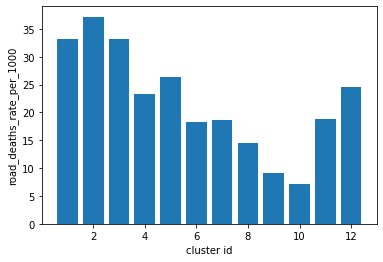

In [ ]:
scc = plt.bar(cluster_df['clusterid'],cluster_df["road_deaths_rate_per_1000"])
plt.xlabel('cluster id')
plt.ylabel('road_deaths_rate_per_1000')

# 4 Discussion & conclusions

In this section we will critically reflect what we have done and give an outlook towards what could be optimized and what research could follow up on our work.

We did a thorough and detailed data cleansing, looking at a lot of outliers and irregularities and conducting research upon them, to investigate whether they are reasonable or not.
Regarding the NaN treatment, we could have predicted all of them instead of imputing the mean, but for now this was sufficient enough.

In the predictive part the score could be improved by trying out more sophisticated and advanced regression models and further trim their parameters to the optimum. The same goes for the second part, where other regression models could certainly improve the score. However, we could verify that the train test split has a big impact on the generizability of a model and how well you could use it for further prediction. E.g. the prediction of values for entirely new cities, relies heavily on how you design your model to begin with. Splitting the train and test set into regions is not a optimal strategy since it biases the prediction by only training and testing on certain areas and carrying through their individual biases, like e.g. the heavily skewed test set of North and South America, caused by the strong influence of the United States. A mixed up train and test set provides a more generic view and is thus, more transferable onto new data.

The exploratory part has been exciting, giving us the opportunity to further investigate the data and come up with interesting research questions ourselves. What is thrilling about it, is the impact these predictions could have, in our case on actually saving lives and decreasing fatal accidents on the streets. Our keras model gives a taste of what is possible here and can certainly be further optimized so it can lead to more accurate predictions. Furthermore, it would be interesting to investigate, the actual reason and what influences the numbers of road deaths the most, for each city individually. This would bring the opportunity to tackle the problem right at its source. We tried to add to that in the last part of our project.

Here we further investigated the phenomenon of road deaths when looking and comparing it to factors like GDP, the dominant modeshare and urban typology. Hereby we wanted to analyse how these things might affect each other and especially, whether there are clusters, which can prove that there is a red line accross the globe. Indeed, poorer cities have more annual deaths on the road per capita compared to richer cities. This opens a great research opportunity for further looking into the actual reasons. A few assumptions from our side:
It could be due to the condition of the streets, which make it more dangerous to drive on. Same goes for the traffic in those regions, which is often very hectic and the streets are more filled with cars than e.g. here in Copenhagen. Furthermore, it could be that less people actually own licenses or do not get the intense training that people in Denmark or Germany for example have to go through to obtain a license.


### Contributions

Introduction: Jonas

Preliminary data cleansing: Jonas

Data cleansing part 1: Jonas

Data cleansing part 2: Laurids

Data cleansing part 3: Jonas

Data cleansing part 4: Kiriakos

Prediction part 1: Kiriakos

Prediction part 2: Kiriakos, Jonas

Exploratory part 1: Laurids

Exploratory part 2: Kiriakos

Exploratory part 3: Laurids, Jonas

Discussion & Conclusion: Kiriakos, Laurids, Jonas 

